In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import math
from bokeh.models import NumeralTickFormatter  
import folium
import tensorflow as tf
from keras import Sequential
from keras.layers import BatchNormalization,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report,accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

In [2]:
df = pd.read_csv('Chicago 2022-2025.csv')

In [3]:
df.shape

(771651, 23)

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,13024128,JG202134,12/31/2022 11:55:00 PM,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,...,29.0,25.0,15,1139642.0,1898786.0,2022,11/15/2023 03:41:31 PM,41.878374,-87.762732,POINT (-87.762731975 41.878373984)
1,1,12938426,JG100085,12/31/2022 11:50:00 PM,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,29.0,25.0,08B,1139357.0,1900199.0,2022,01/07/2023 03:41:08 PM,41.882257,-87.763744,POINT (-87.763744015 41.882256634)
2,2,12938337,JG100016,12/31/2022 11:50:00 PM,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,...,49.0,1.0,07,1165385.0,1946614.0,2022,01/07/2023 03:41:08 PM,42.009108,-87.666844,POINT (-87.666843608 42.009107852)
3,3,12938351,JG100087,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,...,21.0,73.0,08A,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203)
4,4,12938340,JG100005,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,...,21.0,73.0,15,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203)


In [5]:
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,771651.000000,7.716510e+05,771651.000000,771651.000000,771638.000000,771649.000000,7.651740e+05,7.651740e+05,771651.000000,765174.000000,765174.000000
mean,385825.000000,1.312713e+07,1155.648206,11.326758,23.229470,36.252621,1.165331e+06,1.887379e+06,2023.054092,41.846548,-87.668771
std,222756.600622,7.375626e+05,709.882464,7.094467,14.049431,21.581174,1.642265e+04,3.184365e+04,0.839088,0.087574,0.059753
min,0.000000,2.654300e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.000000,36.619446,-91.686566
25%,192912.500000,1.287454e+07,533.000000,5.000000,10.000000,22.000000,1.153972e+06,1.859960e+06,2022.000000,41.771056,-87.710095
50%,385825.000000,1.315992e+07,1033.000000,10.000000,24.000000,32.000000,1.167155e+06,1.893743e+06,2023.000000,41.864098,-87.661853
75%,578737.500000,1.344438e+07,1732.000000,17.000000,34.000000,53.000000,1.176766e+06,1.910282e+06,2024.000000,41.909741,-87.626906
max,771650.000000,1.373469e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951506e+06,2025.000000,42.022549,-87.524532


In [6]:
mode_values = df.mode().iloc[0]
print(mode_values)

Unnamed: 0                                               0
ID                                                   26543
Case Number                                       JF198311
Date                                01/01/2022 12:00:00 AM
Block                                     001XX N STATE ST
IUCR                                                  0486
Primary Type                                         THEFT
Description                                         SIMPLE
Location Description                                STREET
Arrest                                               False
Domestic                                             False
Beat                                                1834.0
District                                               8.0
Ward                                                  27.0
Community Area                                        25.0
FBI Code                                                06
X Coordinate                                     1176352

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771651 entries, 0 to 771650
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            771651 non-null  int64  
 1   ID                    771651 non-null  int64  
 2   Case Number           771651 non-null  object 
 3   Date                  771651 non-null  object 
 4   Block                 771651 non-null  object 
 5   IUCR                  771651 non-null  object 
 6   Primary Type          771651 non-null  object 
 7   Description           771651 non-null  object 
 8   Location Description  768260 non-null  object 
 9   Arrest                771651 non-null  bool   
 10  Domestic              771651 non-null  bool   
 11  Beat                  771651 non-null  int64  
 12  District              771651 non-null  int64  
 13  Ward                  771638 non-null  float64
 14  Community Area        771649 non-null  float64
 15  

In [8]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,13024128,JG202134,12/31/2022 11:55:00 PM,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,...,29.0,25.0,15,1139642.0,1898786.0,2022,11/15/2023 03:41:31 PM,41.878374,-87.762732,POINT (-87.762731975 41.878373984)
1,1,12938426,JG100085,12/31/2022 11:50:00 PM,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,29.0,25.0,08B,1139357.0,1900199.0,2022,01/07/2023 03:41:08 PM,41.882257,-87.763744,POINT (-87.763744015 41.882256634)
2,2,12938337,JG100016,12/31/2022 11:50:00 PM,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,...,49.0,1.0,07,1165385.0,1946614.0,2022,01/07/2023 03:41:08 PM,42.009108,-87.666844,POINT (-87.666843608 42.009107852)
3,3,12938351,JG100087,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,...,21.0,73.0,08A,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203)
4,4,12938340,JG100005,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,...,21.0,73.0,15,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203)


In [9]:
print("The names of the features :\n", list(df.columns))

The names of the features :
 ['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


In [10]:
crimes = df['Primary Type'].unique()
print("The Number of distinct crimes in Chicago in the year 2021:", len(crimes))
print()
print("The Distinct Crimes are :\n", crimes)

The Number of distinct crimes in Chicago in the year 2021: 31

The Distinct Crimes are :
 ['WEAPONS VIOLATION' 'BATTERY' 'MOTOR VEHICLE THEFT' 'ASSAULT'
 'CRIMINAL SEXUAL ASSAULT' 'OTHER OFFENSE' 'CRIMINAL DAMAGE'
 'CRIMINAL TRESPASS' 'THEFT' 'SEX OFFENSE' 'BURGLARY' 'HOMICIDE'
 'LIQUOR LAW VIOLATION' 'ROBBERY' 'NARCOTICS' 'DECEPTIVE PRACTICE'
 'PUBLIC PEACE VIOLATION' 'OFFENSE INVOLVING CHILDREN' 'STALKING' 'ARSON'
 'INTIMIDATION' 'KIDNAPPING' 'INTERFERENCE WITH PUBLIC OFFICER'
 'CONCEALED CARRY LICENSE VIOLATION' 'OTHER NARCOTIC VIOLATION'
 'PROSTITUTION' 'OBSCENITY' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'PUBLIC INDECENCY' 'GAMBLING']


In [11]:
print("Number of Missing Values in the whole dataset : ", df.isna().sum().sum()) 

Number of Missing Values in the whole dataset :  35791


In [12]:
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

Unnamed: 0              0.000000
ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.439447
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000000
Ward                    0.001685
Community Area          0.000259
FBI Code                0.000000
X Coordinate            0.839369
Y Coordinate            0.839369
Year                    0.000000
Updated On              0.000000
Latitude                0.839369
Longitude               0.839369
Location                0.839369
dtype: float64


In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762169 entries, 0 to 771650
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            762169 non-null  int64  
 1   ID                    762169 non-null  int64  
 2   Case Number           762169 non-null  object 
 3   Date                  762169 non-null  object 
 4   Block                 762169 non-null  object 
 5   IUCR                  762169 non-null  object 
 6   Primary Type          762169 non-null  object 
 7   Description           762169 non-null  object 
 8   Location Description  762169 non-null  object 
 9   Arrest                762169 non-null  bool   
 10  Domestic              762169 non-null  bool   
 11  Beat                  762169 non-null  int64  
 12  District              762169 non-null  int64  
 13  Ward                  762169 non-null  float64
 14  Community Area        762169 non-null  float64
 15  FBI C

In [14]:
t = df['Date'][20]
print(t)
s1 = t[:11] 
print(s1)
s2 = t[11:]
print(s2)
print(s2)
hr = s2[:2]
mins = s2[3:5]
sec = s2[6:8]
time_frame = s2[9:]
if(time_frame == 'PM'):
    if (int(hr) != 12):
        hr = str(int(hr) + 12)
else:
    if(int(hr) == 12):
        hr = '00'
print(hr, mins, sec)

12/31/2022 11:30:00 PM
12/31/2022 
11:30:00 PM
11:30:00 PM
23 30 00


In [15]:
month = s1[:2]
date = s1[3:5]
year = s1[6:10]
final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
print(final_date)

2022-12-31 23:30:00


In [16]:
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [17]:
df['Date'] = df['Date'].apply(time_convert)

In [18]:
def month(x):
    return x.strftime("%B")
df['Month'] = df['Date'].apply(month)

In [19]:
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
0,0,13024128,JG202134,2022-12-31 23:55:00,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,...,25.0,15,1139642.0,1898786.0,2022,11/15/2023 03:41:31 PM,41.878374,-87.762732,POINT (-87.762731975 41.878373984),December
1,1,12938426,JG100085,2022-12-31 23:50:00,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,25.0,08B,1139357.0,1900199.0,2022,01/07/2023 03:41:08 PM,41.882257,-87.763744,POINT (-87.763744015 41.882256634),December
2,2,12938337,JG100016,2022-12-31 23:50:00,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,...,1.0,07,1165385.0,1946614.0,2022,01/07/2023 03:41:08 PM,42.009108,-87.666844,POINT (-87.666843608 42.009107852),December
3,3,12938351,JG100087,2022-12-31 23:47:00,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,...,73.0,08A,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203),December
4,4,12938340,JG100005,2022-12-31 23:47:00,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,...,73.0,15,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203),December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771646,771646,13711100,JJ103730,2025-01-01 00:00:00,006XX N HOMAN AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,...,23.0,17,1153596.0,1904101.0,2025,01/08/2025 03:42:09 PM,41.892693,-87.711354,POINT (-87.711354059 41.892692881),January
771647,771647,13709287,JJ101650,2025-01-01 00:00:00,106XX S WOODLAWN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,WAREHOUSE,False,...,50.0,14,1186109.0,1834679.0,2025,01/08/2025 03:42:09 PM,41.701485,-87.594141,POINT (-87.594140525 41.701484801),January
771648,771648,13716760,JJ110451,2025-01-01 00:00:00,095XX S RACINE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,73.0,14,1170008.0,1841252.0,2025,01/12/2025 03:41:05 PM,41.719886,-87.652907,POINT (-87.652906836 41.719886226),January
771649,771649,13708661,JJ100759,2025-01-01 00:00:00,067XX S TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,...,65.0,05,1149201.0,1859518.0,2025,01/08/2025 03:42:09 PM,41.770437,-87.728648,POINT (-87.728647819 41.770437372),January


In [20]:
numerical_columns = df.select_dtypes(include=['number'])
variance = numerical_columns.var()
print(variance)

Unnamed: 0        4.957304e+10
ID                5.490844e+11
Beat              5.039451e+05
District          5.033372e+01
Ward              1.970063e+02
Community Area    4.651695e+02
X Coordinate      2.699258e+08
Y Coordinate      1.013838e+09
Year              7.032271e-01
Latitude          7.667852e-03
Longitude         3.573273e-03
dtype: float64


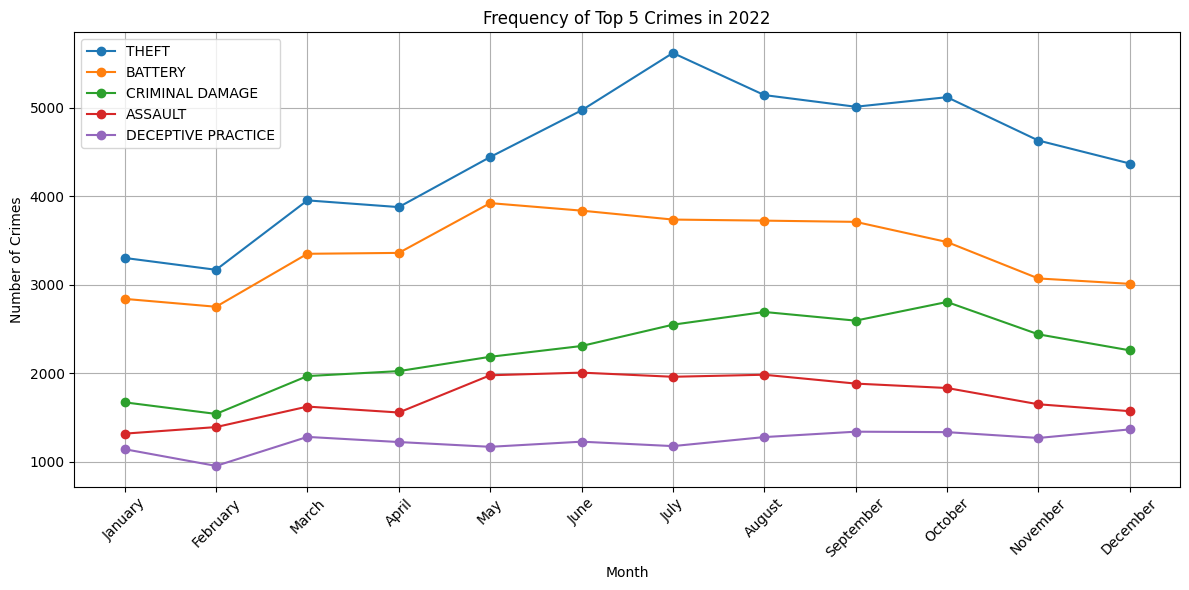

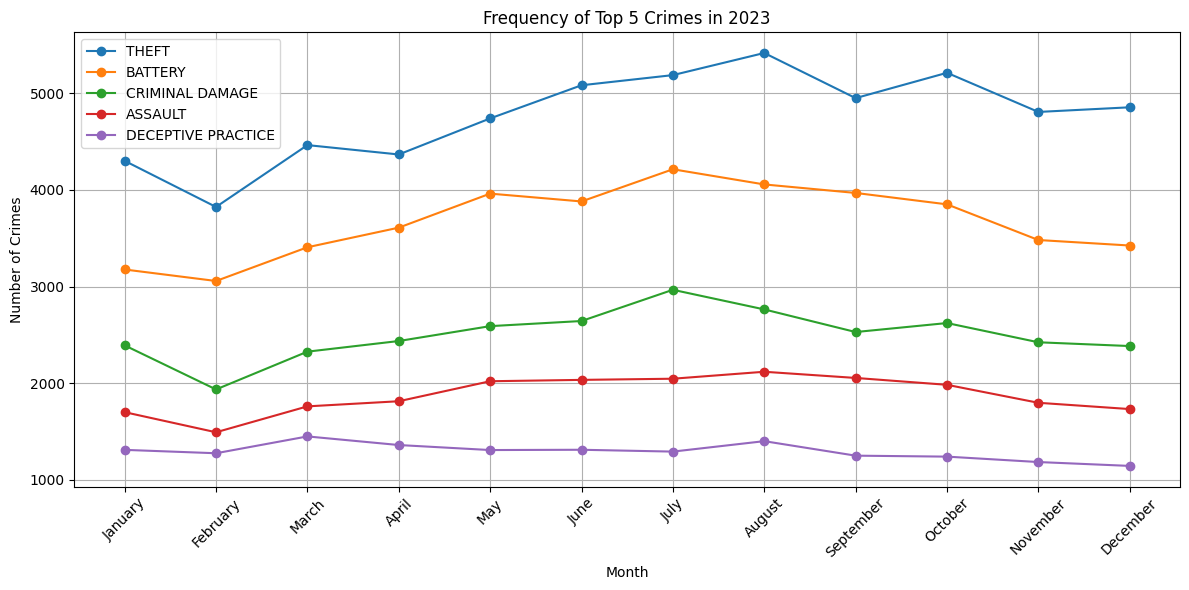

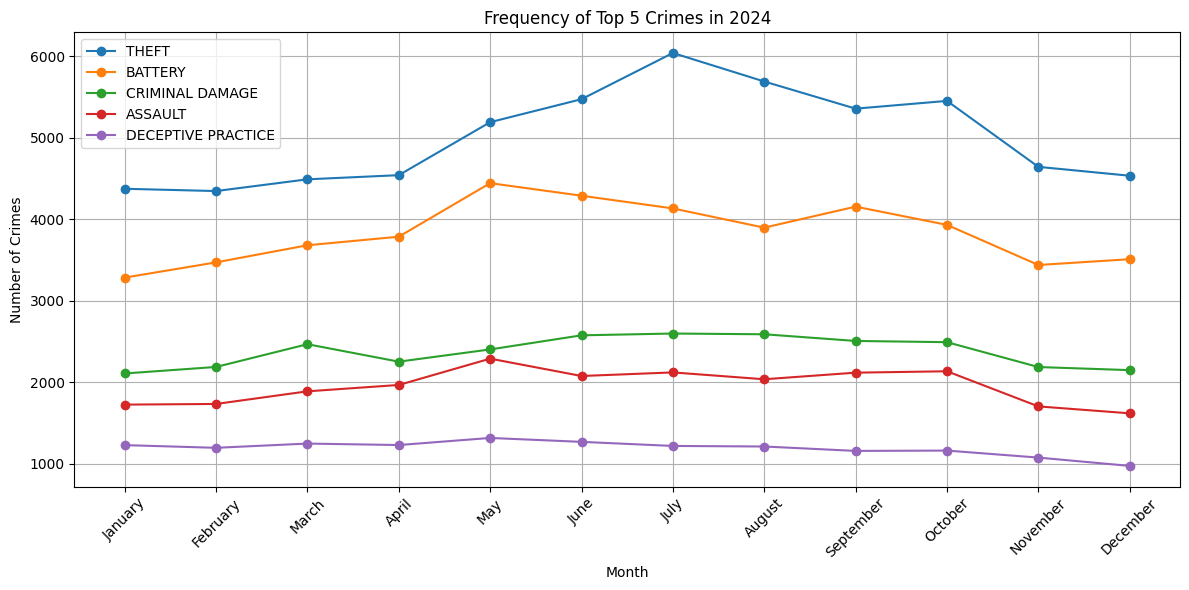

In [21]:
crime_types = ["THEFT", "BATTERY", "CRIMINAL DAMAGE", "ASSAULT", "DECEPTIVE PRACTICE"]
years = [2022, 2023, 2024]
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
def plot_crime_trends(year):
    df_year = df[df['Year'] == year]
    crime_data = df_year[df_year['Primary Type'].isin(crime_types)]
    crime_counts = crime_data.groupby(['Month', 'Primary Type']).size().unstack(fill_value=0).reindex(months)
    plt.figure(figsize=(12, 6))
    for crime in crime_types:
        plt.plot(crime_counts.index, crime_counts[crime], marker='o', label=crime)
    plt.title(f'Frequency of Top 5 Crimes in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
for year in years:
    plot_crime_trends(year)

In [22]:
theft_df = df[df['Primary Type']=='THEFT']
battery_df = df[df['Primary Type']=='BATTERY'] 
crim_dam_df = df[df['Primary Type']=='CRIMINAL DAMAGE']
assault_df = df[df['Primary Type']=='ASSAULT']
dec_prac_df = df[df['Primary Type']=='DECEPTIVE PRACTICE']

In [23]:
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]
arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Percentage of no arrests of all reported crimes :",false/(false+true)*100,'!')

Percentage of no arrests of all reported crimes : 87.40935409338348 !


C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2898829965.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  false = l[0]
C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2898829965.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true = l[1]


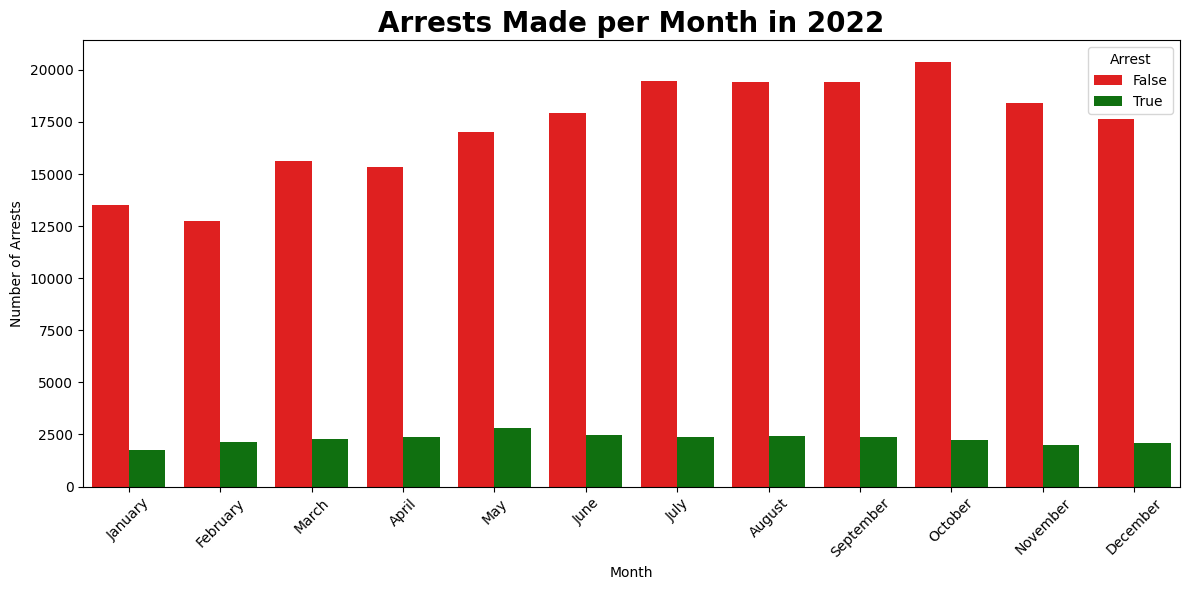

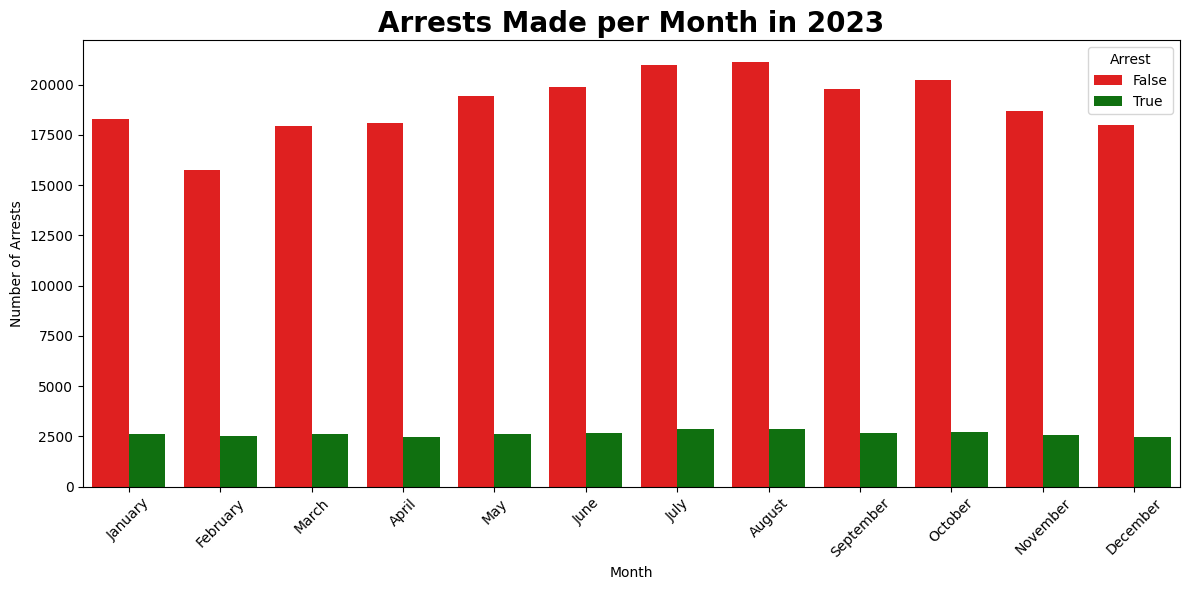

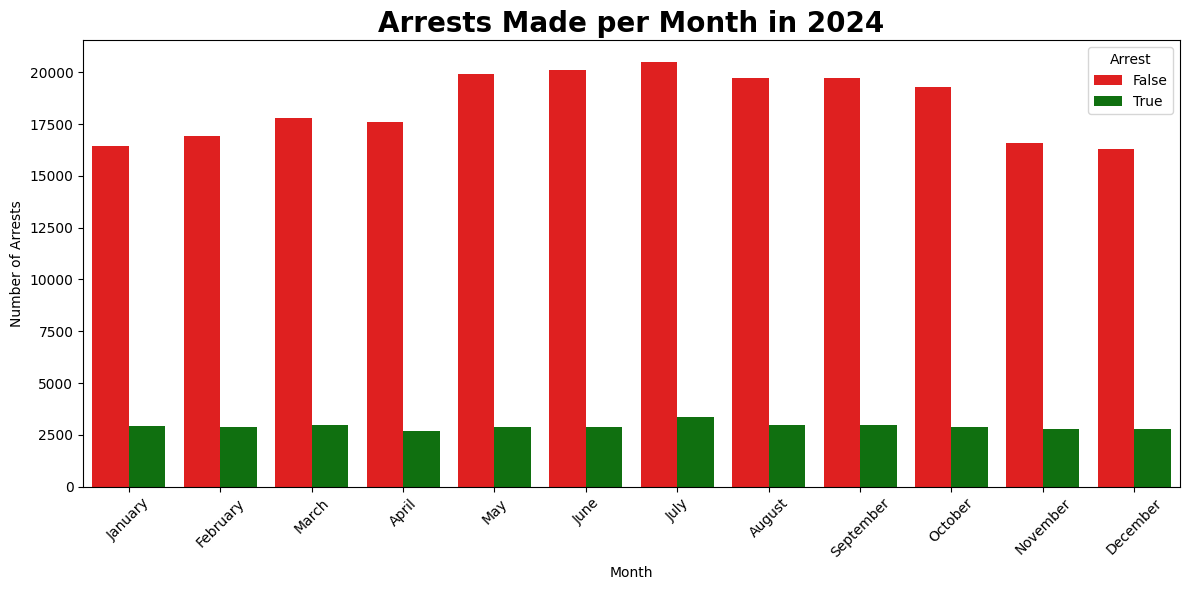

In [24]:
months = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    
years=[2022,2023,2024]
def plot_arrests(year):
    df_year = df[df['Year'] == year]
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(x="Month", hue='Arrest', data=df_year, 
                  order=months, palette=['Red', 'Green'], ax=ax)
    
    ax.set(title=f'Arrests Made per Month in {year}',
           xlabel='Month', ylabel='Number of Arrests')
    ax.set_xticklabels(months, rotation=45)
    
    plt.title(f'Arrests Made per Month in {year}', 
              fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
    plt.tight_layout()
    plt.show()
for year in years:
    plot_arrests(year)

In [25]:
arrest_crime = df.groupby(['Primary Type', 'Arrest']).agg({'Arrest':"count"})
arrest_crime.columns = ["Count"]

In [26]:
the_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT', 'DECEPTIVE PRACTICE','WEAPONS VIOLATION','NARCOTICS',
           'HOMICIDE','BURGLARY','INTERFERENCE WITH PUBLIC OFFICER']
arrest = pd.DataFrame(columns=['Crime','True','False'])
for i,crime in enumerate(the_crimes):
    subset = df[df['Primary Type']==crime]
    true = subset['Arrest'].value_counts().sort_index()[1]
    false = subset['Arrest'].value_counts().sort_index()[0]
    temp_df = pd.DataFrame({'Crime':[crime], 'True':[true], 'False':[false]})
    arrest = pd.concat([arrest, temp_df], ignore_index=True)
    arrest['True_per']=arrest['True']/(arrest['True']+arrest['False'])*100
    arrest['False_per']=arrest['False']/(arrest['True']+arrest['False'])*100
def style(p):
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'
        return p
status = ['Arrested','Not Arrested']
arrest_cds = ColumnDataSource(arrest)
crimes = arrest_cds.data['Crime'].tolist()
fig2 = figure(x_range=crimes, width = 700, height = 700, 
                title = 'Arrests vs Crime Type',
                x_axis_label = 'Arrest Status', y_axis_label = 'Number of Crimes')
fig2.vbar_stack(stackers = ['True','False'], x='Crime',width=0.25, legend_label=['Arrested', 'Not Arrested'], source=arrest_cds,
               color=['green','red'])
fig2.xaxis.major_label_orientation = math.pi/2
fig2.yaxis.formatter = NumeralTickFormatter(format="0")
tooltips = [('Crime','@Crime'),('Arrested Percentage','@True_per'), ('Not Arrested Percentage', '@False_per')]
hover = HoverTool(tooltips=tooltips, mode='vline')
fig2.add_tools(hover)
output_notebook()
show(fig2)

C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2534431510.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true = subset['Arrest'].value_counts().sort_index()[1]
C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2534431510.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  false = subset['Arrest'].value_counts().sort_index()[0]
C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2534431510.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a val

Loading BokehJS ...

In [27]:
def hour(x):
    return x.strftime("%H")
df['Hour_Day'] = df['Date'].apply(hour)

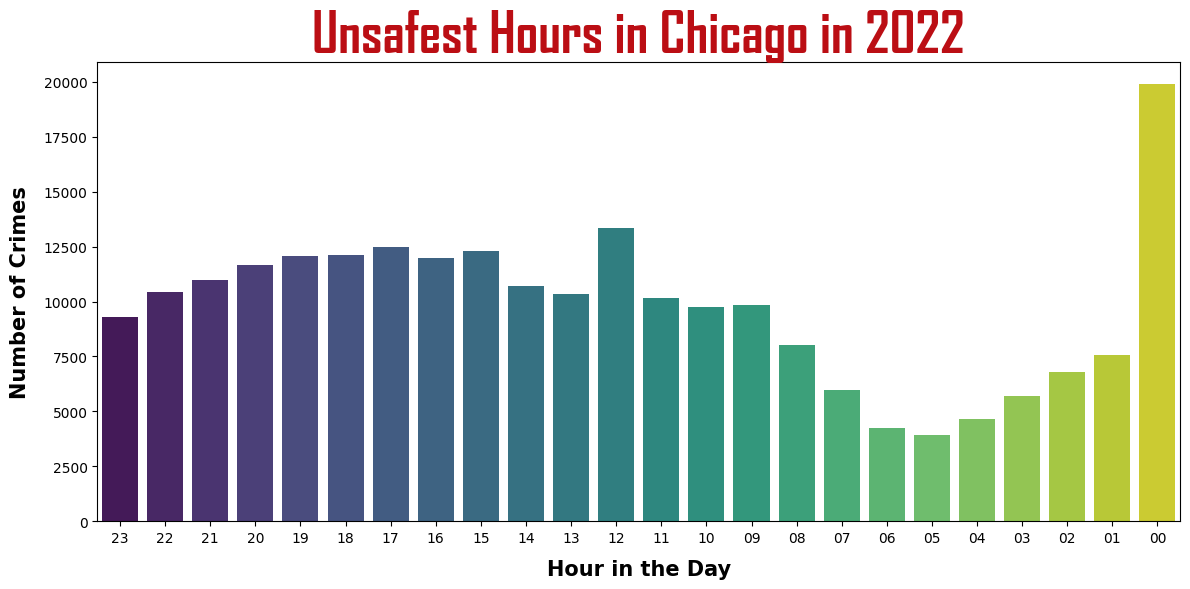

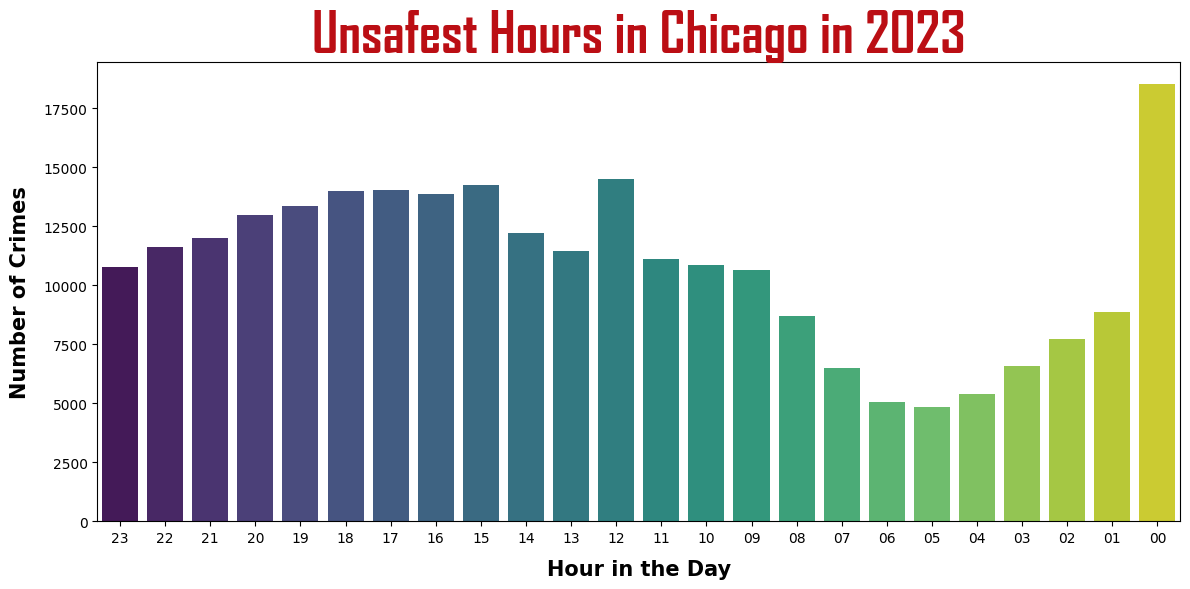

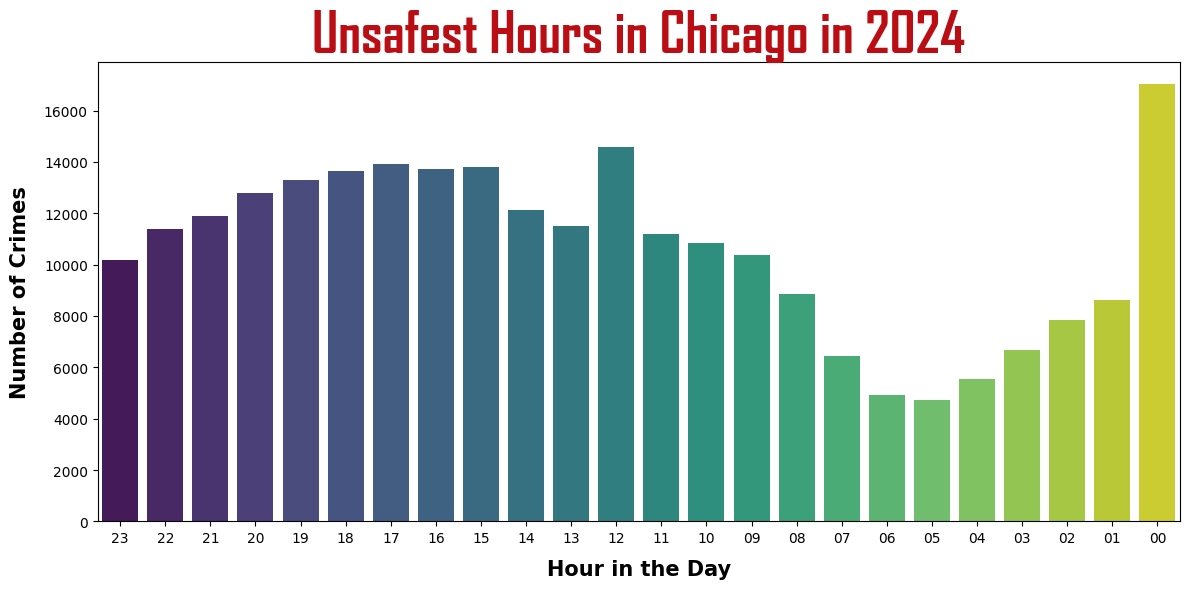

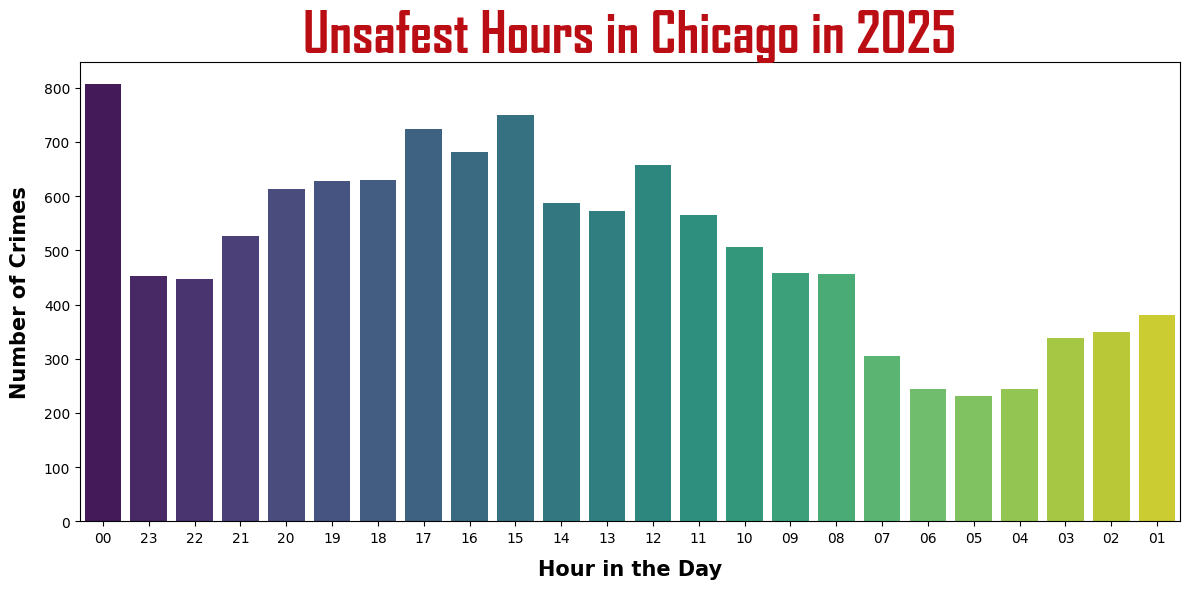

In [28]:
years = [2022, 2023, 2024,2025]
def plot_unsafest_hours(year):
    df_year = df[df['Year'] == year]
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(x='Hour_Day', data=df_year, palette="viridis")
    plt.title(f"Unsafest Hours in Chicago in {year}",
              fontdict={'fontsize': 40, 'color': '#bb0e14', 'fontname': 'Agency FB'},
              weight="bold")
    plt.xlabel("Hour in the Day",
               fontdict={'fontsize': 15, 'fontweight': 'bold'},
               labelpad=10)
    plt.ylabel("Number of Crimes",
               fontdict={'fontsize': 15, 'fontweight': 'bold'},
               labelpad=10)
    plt.tight_layout()
    plt.show()
for year in years:
    plot_unsafest_hours(year)

In [29]:
the_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT', 'DECEPTIVE PRACTICE','WEAPONS VIOLATION','NARCOTICS',
           'HOMICIDE','BURGLARY','INTERFERENCE WITH PUBLIC OFFICER']
dark_hours = ['19', '20', '21', '22', '23', '00', '01', '02', '03','04','05','06','07']
crime_time = df[['Primary Type','Hour_Day']]
c = crime_time.groupby(['Primary Type'])
c.head()
fig3 = figure(x_range=dark_hours, height=500, width=500, title="Does darkness aid all crime ?"+" (Hover over graph for specifics)",x_axis_label='Hour (In 24 hour format)',
             y_axis_label="Number of Crimes")
def plot_it(crime_name):
    dark_hours = ['19', '20', '21', '22', '23', '00', '01', '02', '03','04','05','06','07']
    y = crime_time[crime_time['Primary Type']==crime_name]['Hour_Day'].value_counts().sort_index()[dark_hours]
    cr_dh = pd.DataFrame({"Hour":dark_hours, "Crimes":y})
    cr_dh_cds = ColumnDataSource(cr_dh)
    fig3.vbar(x='Hour', top='Crimes', source=cr_dh_cds, bottom=0, color='red', alpha=0.75, width=0.50)
    tooltips = [
         ('Number of Crimes', '@Crimes'),
    ]
    fig3.add_tools(HoverTool(tooltips=tooltips))
    output_notebook()
    show(fig3)
crime_input = input("Enter the Crime for which you want to visualize the 'Fear the Dark' >> ")
plot_it(crime_input.upper())

Enter the Crime for which you want to visualize the 'Fear the Dark' >> Theft


Loading BokehJS ...

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


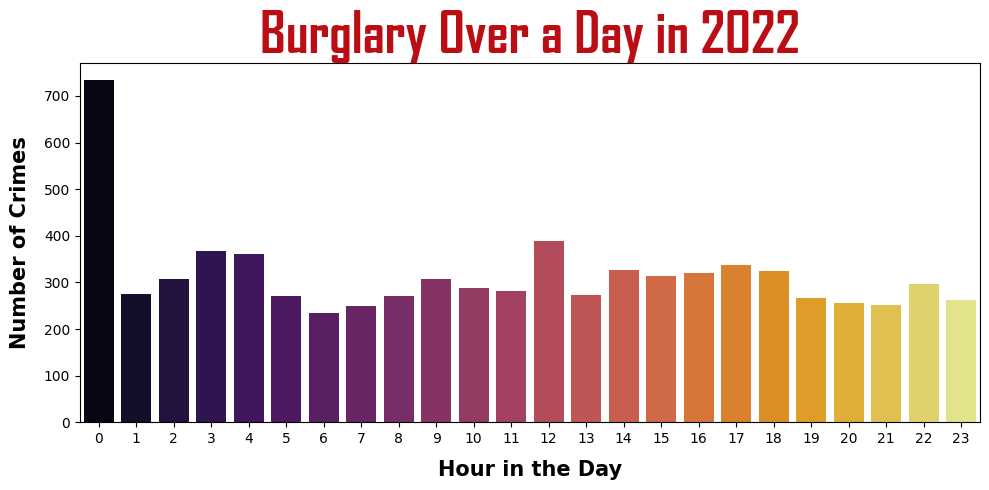

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


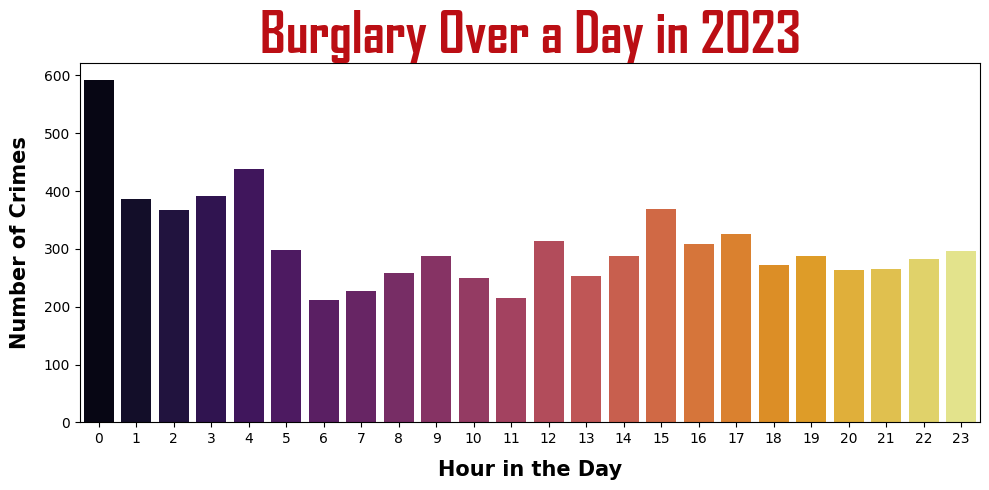

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


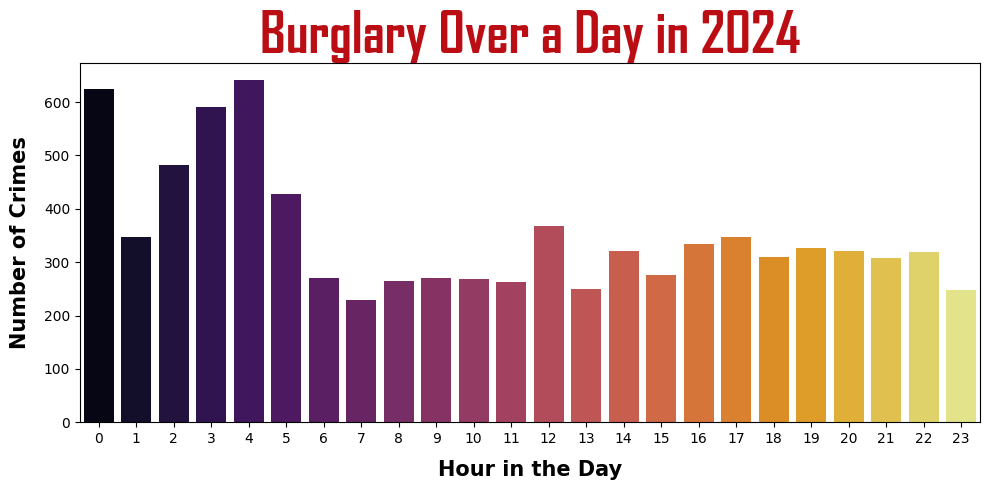

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


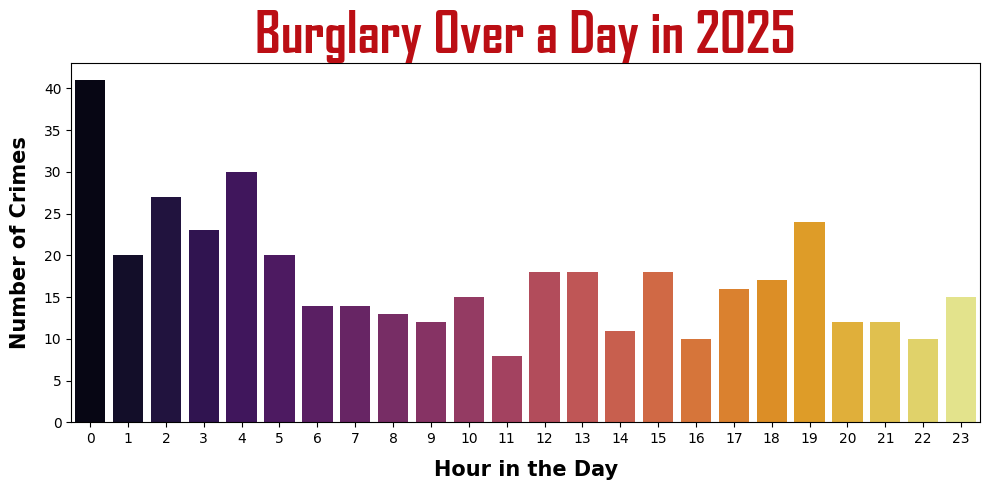

In [30]:
years = df['Year'].unique()
def plot_burglary_by_hour(year):
    burglary_df = df[(df['Primary Type'] == 'BURGLARY') & (df['Year'] == year)]
    hours = sorted([int(x) for x in burglary_df['Hour_Day'].unique()])
    bur_cri = burglary_df['Hour_Day'].value_counts().sort_index().tolist()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=hours, y=bur_cri, palette='inferno')
    plt.title(f"Burglary Over a Day in {year}", 
              fontdict={'fontsize': 40, 'color': '#bb0e14', 'fontname': 'Agency FB'}, 
              weight="bold")
    plt.xlabel("Hour in the Day", fontdict={'fontsize': 15, 'fontweight': 'bold'}, labelpad=10)
    plt.ylabel("Number of Crimes", fontdict={'fontsize': 15, 'fontweight': 'bold'}, labelpad=10)
    plt.tight_layout()
    plt.show()
for year in sorted(years):
    plot_burglary_by_hour(year)

In [31]:
crime_types = ['DECEPTIVE PRACTICE', 'BATTERY', 'CRIMINAL DAMAGE', 
               'MOTOR VEHICLE THEFT', 'THEFT', 'NARCOTICS']
if "Primary Type" in df.columns and "Latitude" in df.columns and "Longitude" in df.columns:
    filtered_crimes = df[df["Primary Type"].isin(crime_types)]
else:
    print("Required columns ('Primary Type', 'Latitude', 'Longitude') not found!")
    filtered_crimes = pd.DataFrame()
chicago_map = folium.Map(location=[41.864073, -87.706819], zoom_start=11, tiles="openstreetmap")
for _, row in filtered_crimes.sample(min(500, len(filtered_crimes))).iterrows():
    lat, lon = row["Latitude"], row["Longitude"]
    marker_color = "red" if row.get("Arrest") else "blue"
    popup_text = f"""Crime: {row['Primary Type']}<br>
                     Arrest: {row.get('Arrest', 'Unknown')}<br>
                     Location Description: {row.get('Location Description', 'Unknown')}<br>"""
    folium.CircleMarker(
        location=[lat, lon],
        popup=popup_text,
        radius=3,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.6
    ).add_to(chicago_map)
chicago_map_file = "Chicago_Crime_Map.html"
chicago_map.save(chicago_map_file)

In [32]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Hour_Day
0,0,13024128,JG202134,2022-12-31 23:55:00,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,...,15,1139642.0,1898786.0,2022,11/15/2023 03:41:31 PM,41.878374,-87.762732,POINT (-87.762731975 41.878373984),December,23
1,1,12938426,JG100085,2022-12-31 23:50:00,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,08B,1139357.0,1900199.0,2022,01/07/2023 03:41:08 PM,41.882257,-87.763744,POINT (-87.763744015 41.882256634),December,23
2,2,12938337,JG100016,2022-12-31 23:50:00,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,...,07,1165385.0,1946614.0,2022,01/07/2023 03:41:08 PM,42.009108,-87.666844,POINT (-87.666843608 42.009107852),December,23
3,3,12938351,JG100087,2022-12-31 23:47:00,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,...,08A,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203),December,23
4,4,12938340,JG100005,2022-12-31 23:47:00,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,...,15,1167940.0,1844124.0,2022,01/07/2023 03:41:08 PM,41.727812,-87.660399,POINT (-87.660399127 41.72781203),December,23


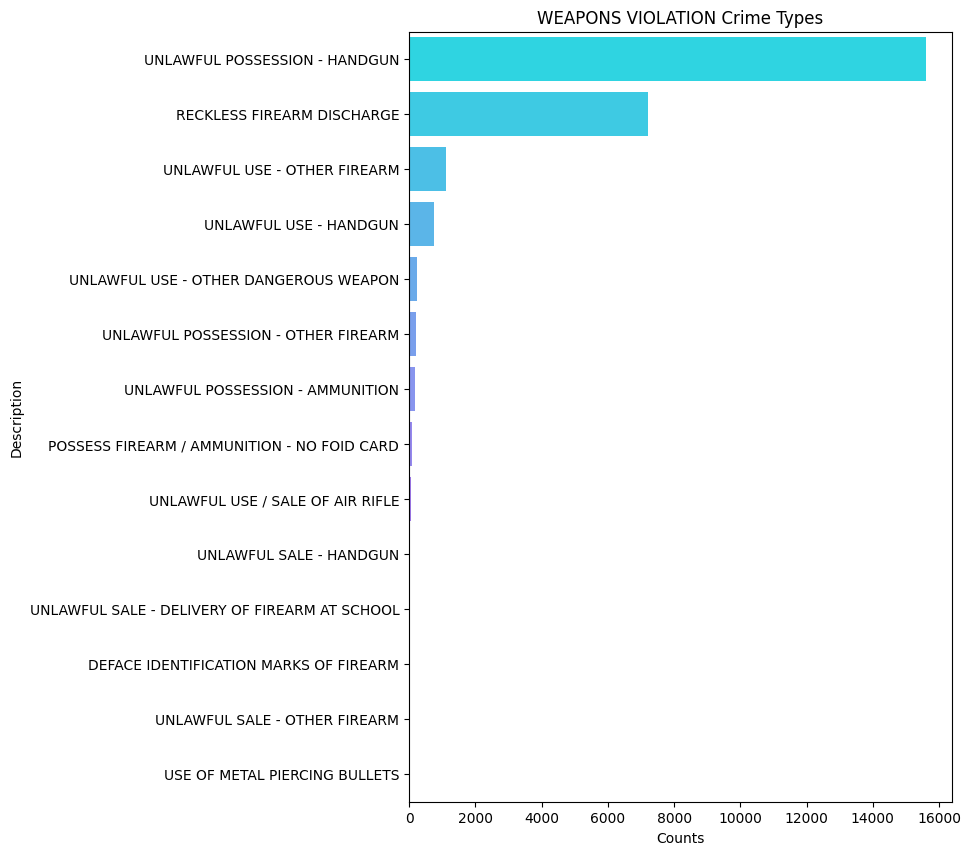

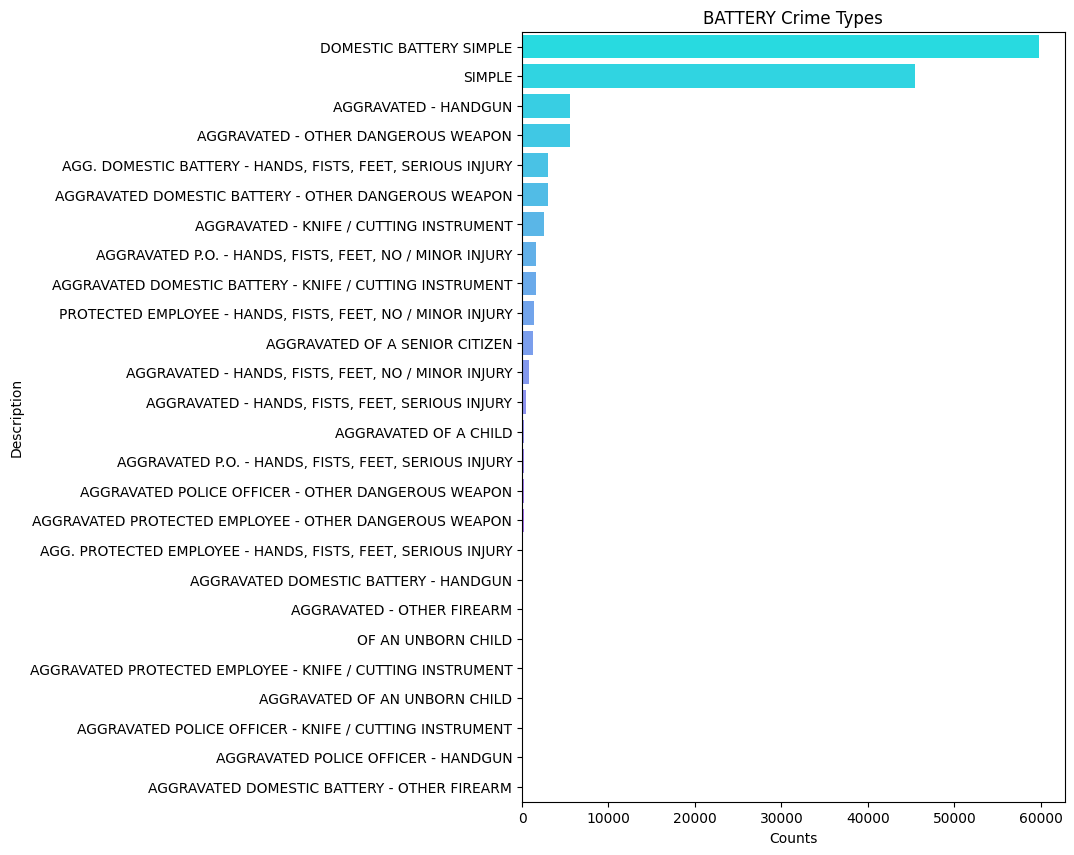

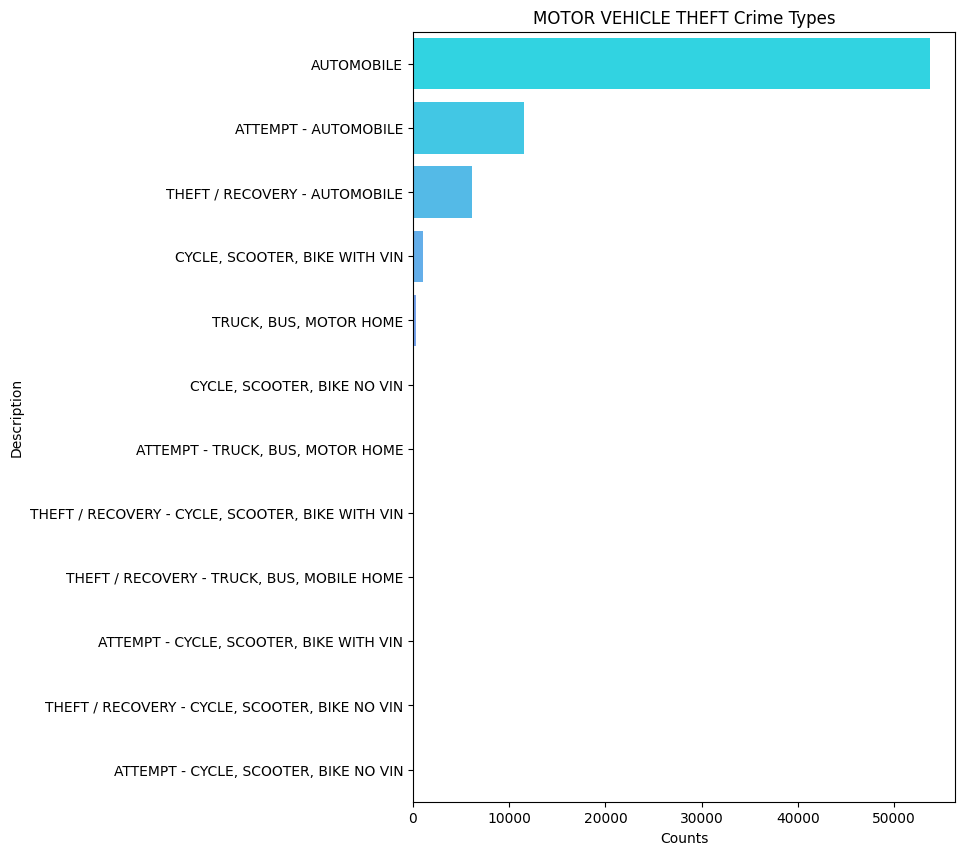

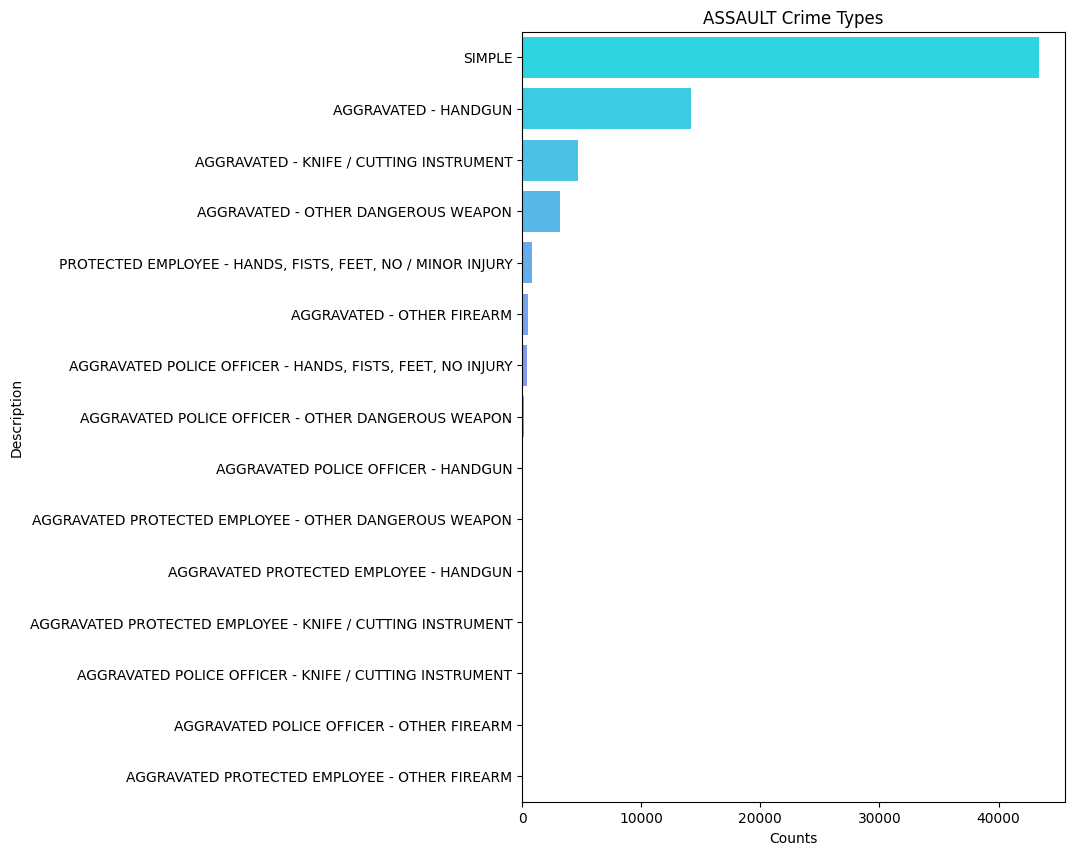

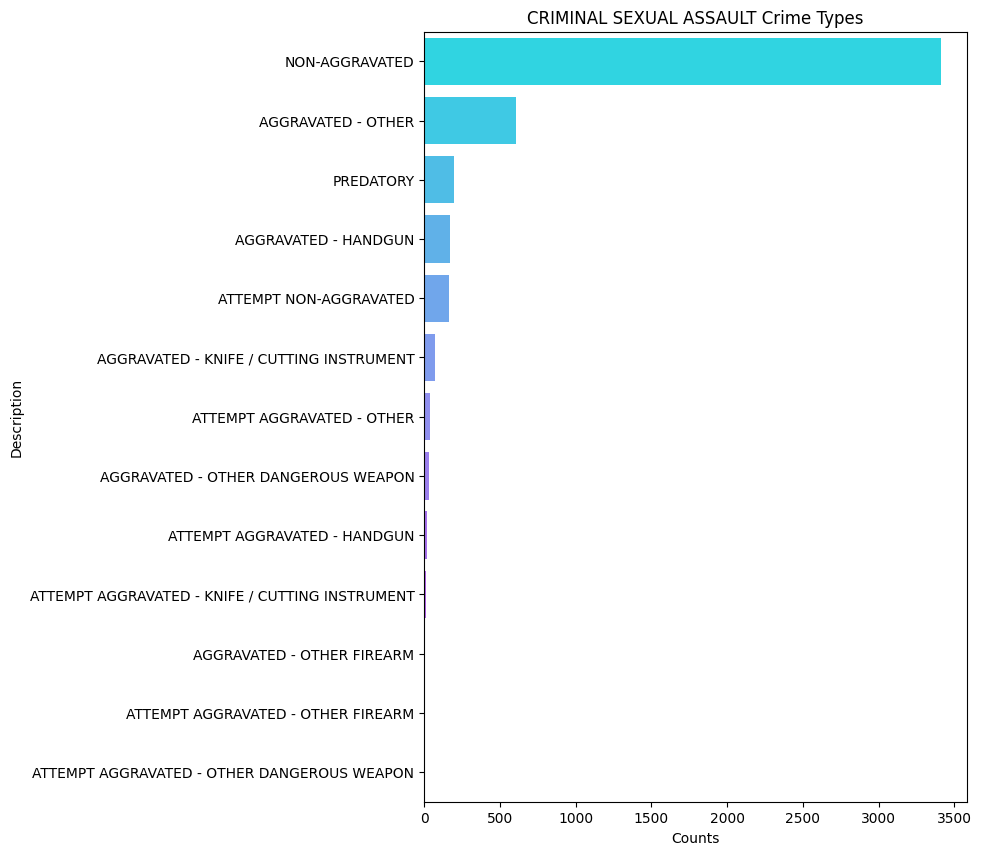

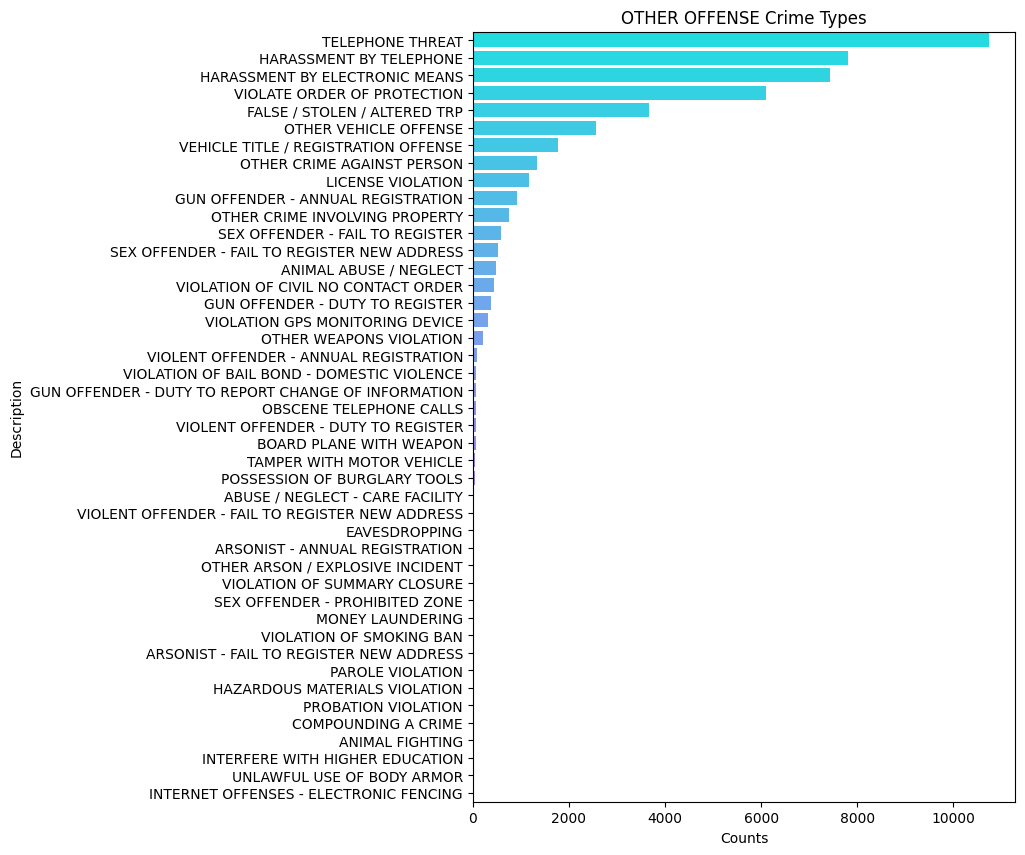

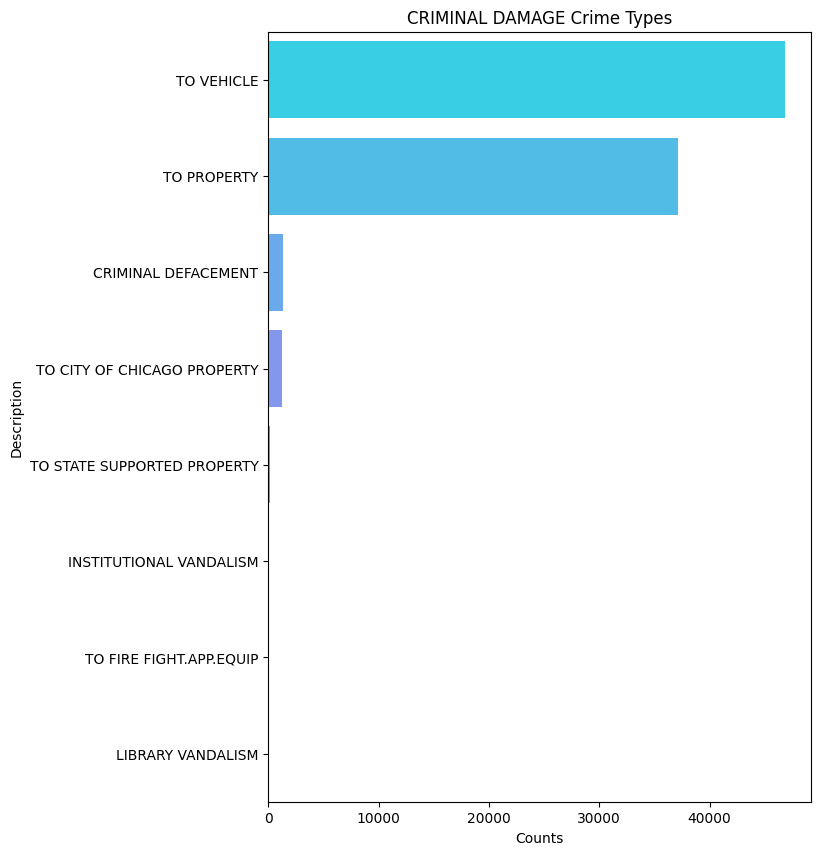

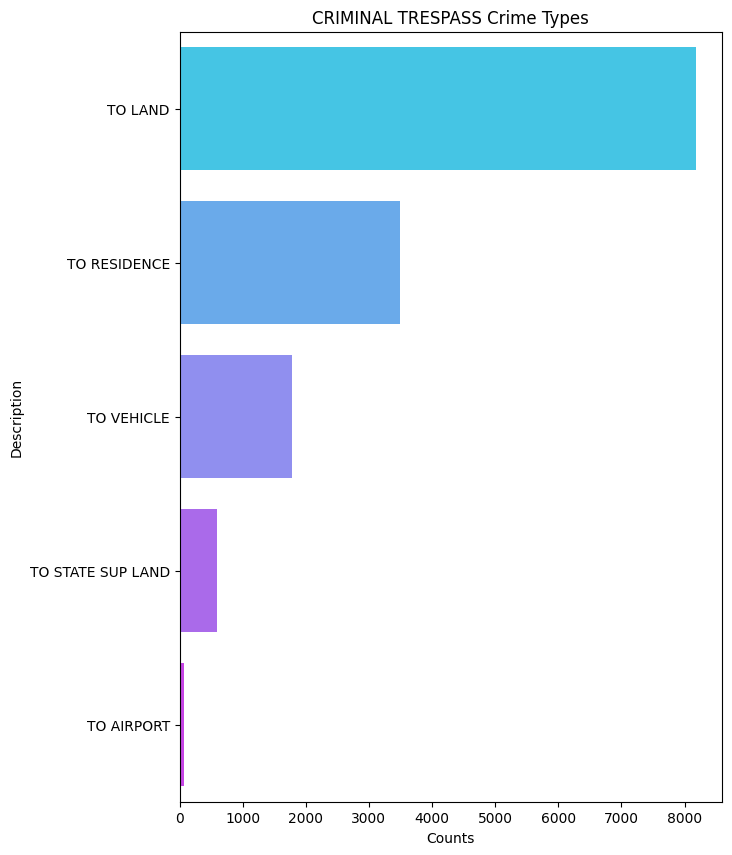

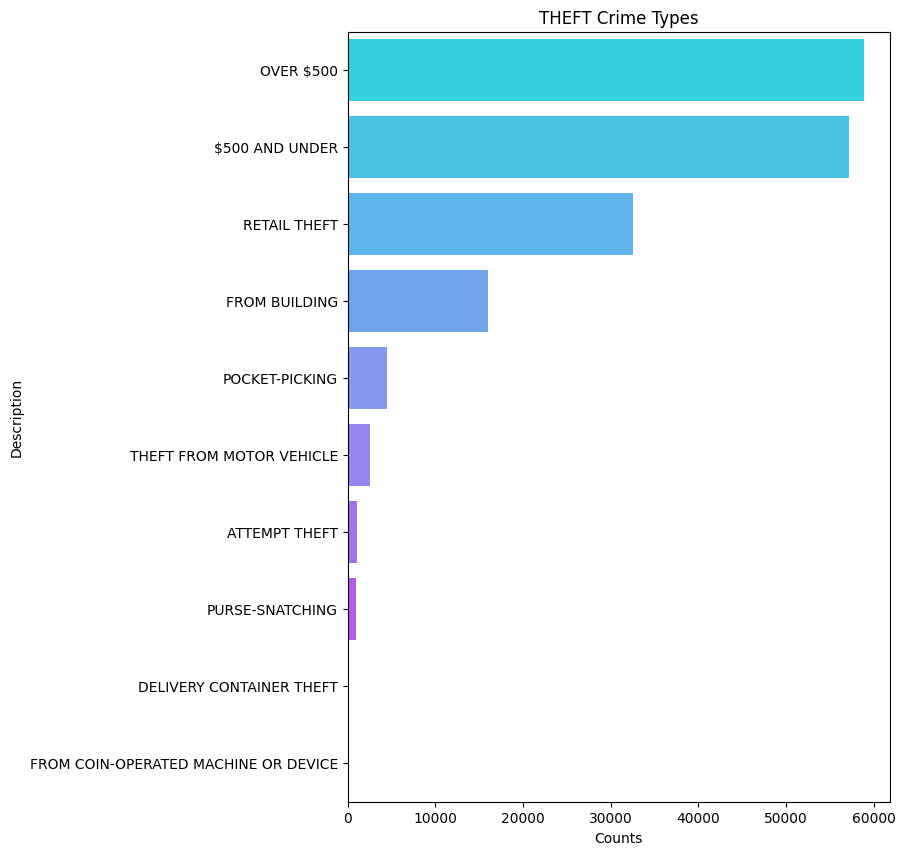

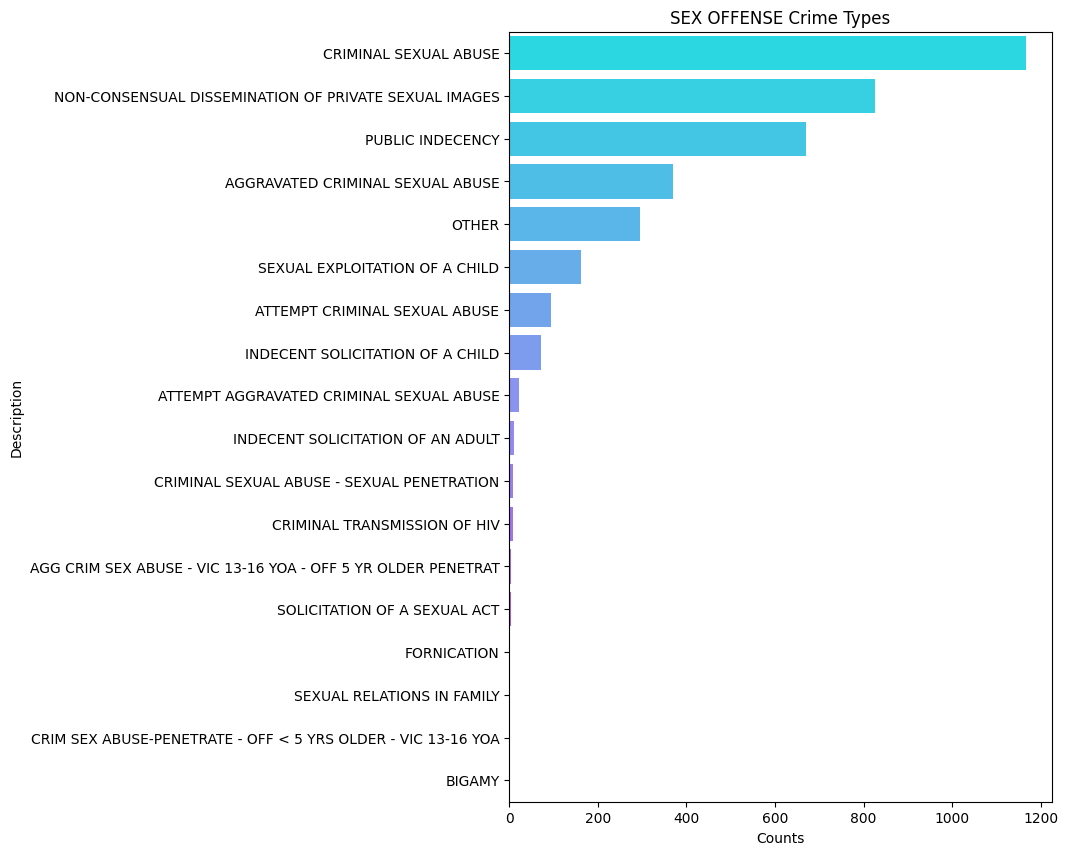

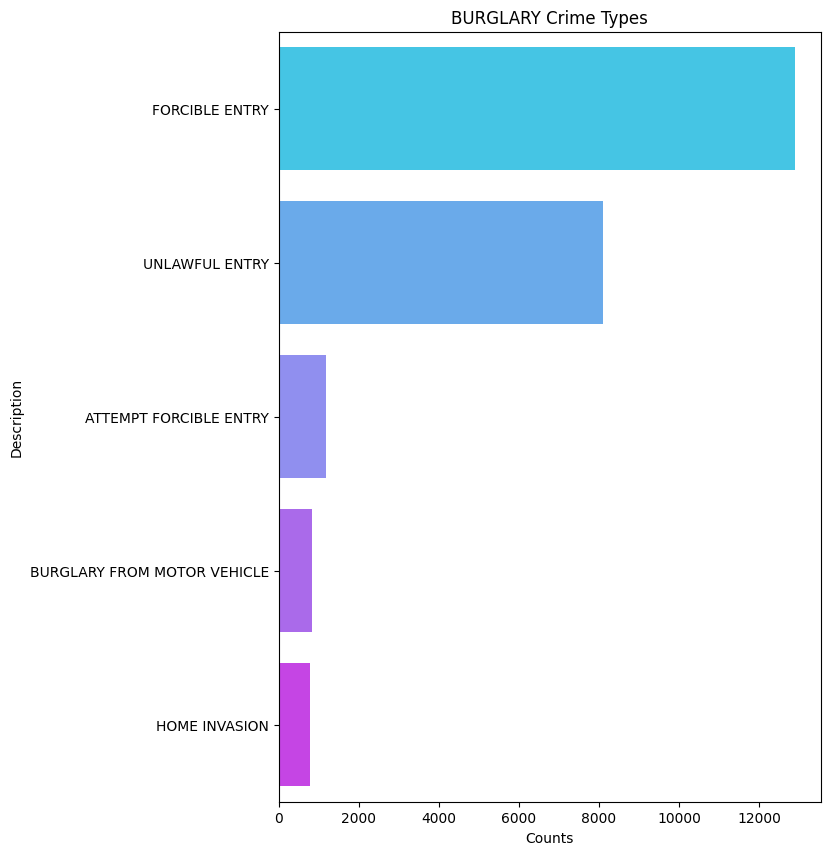

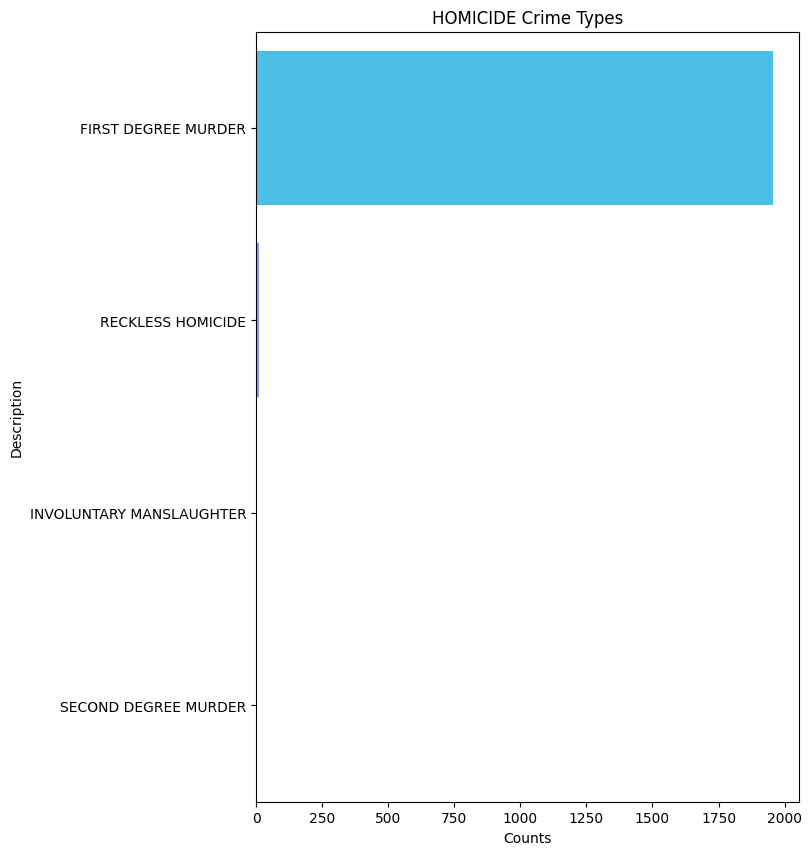

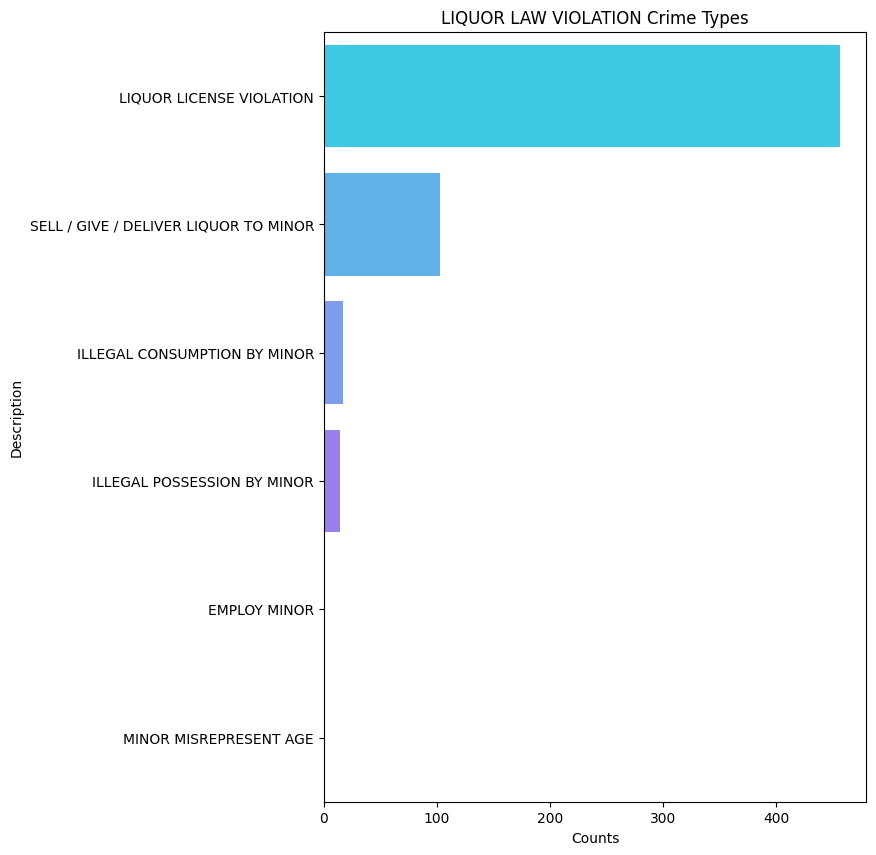

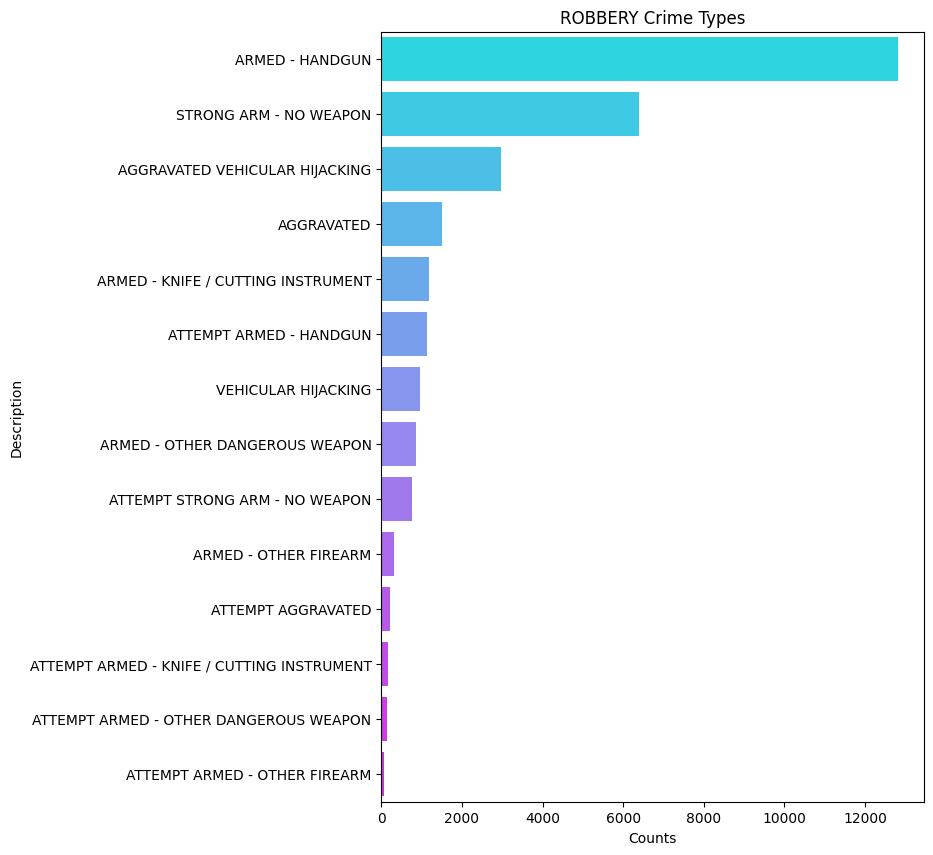

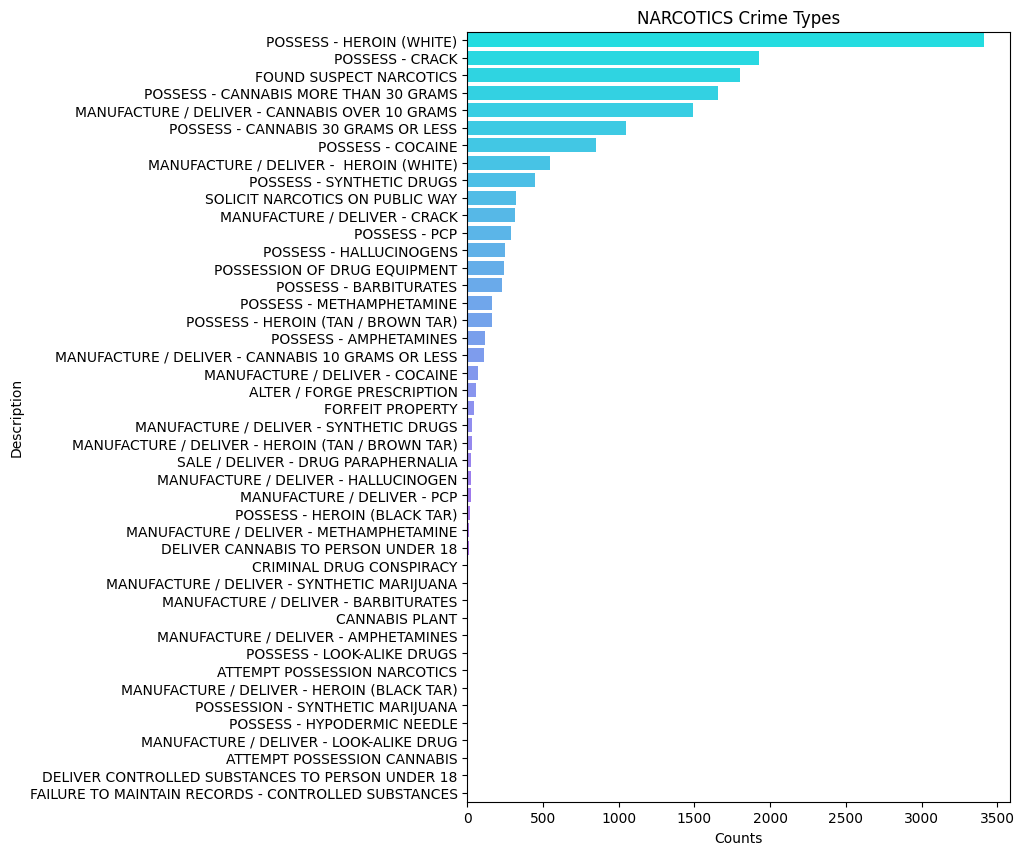

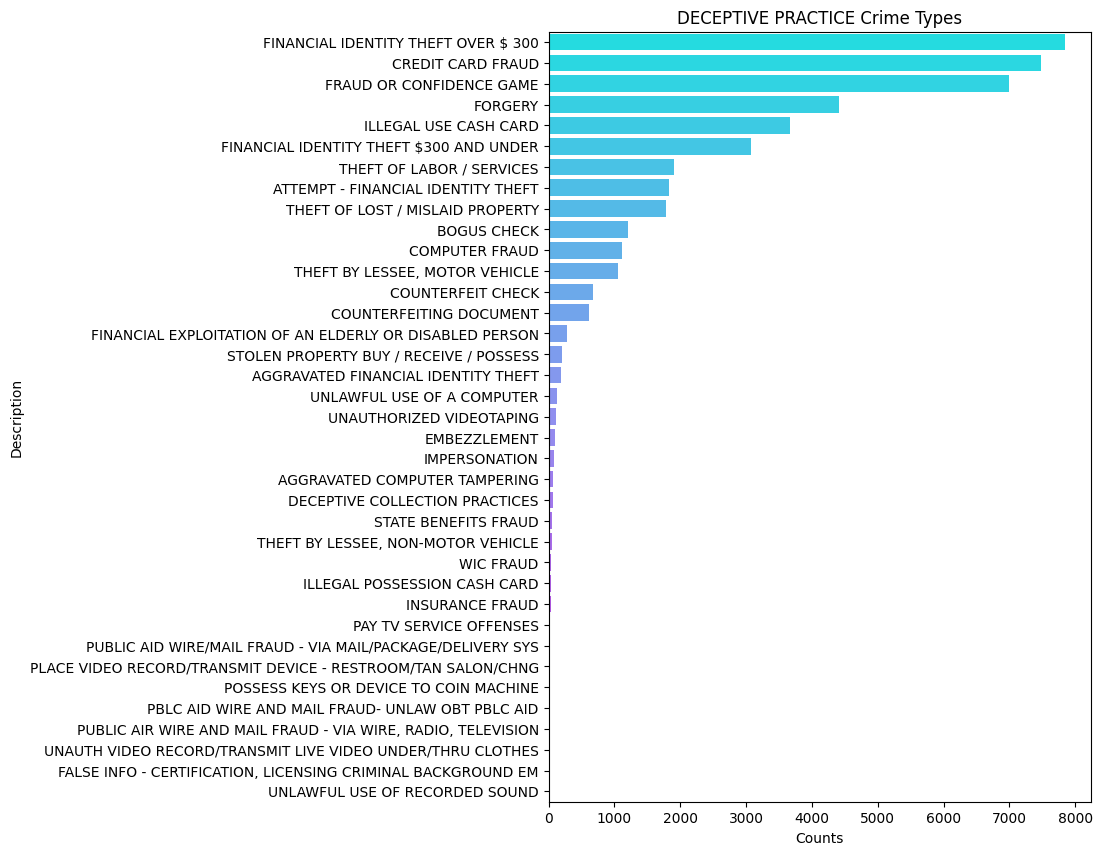

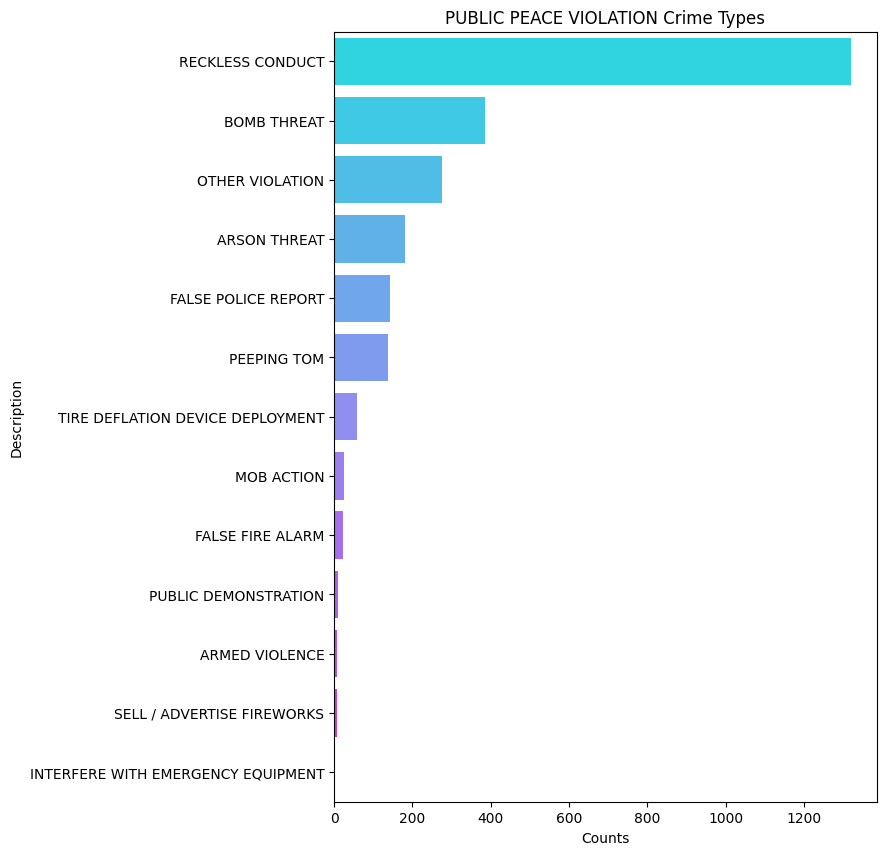

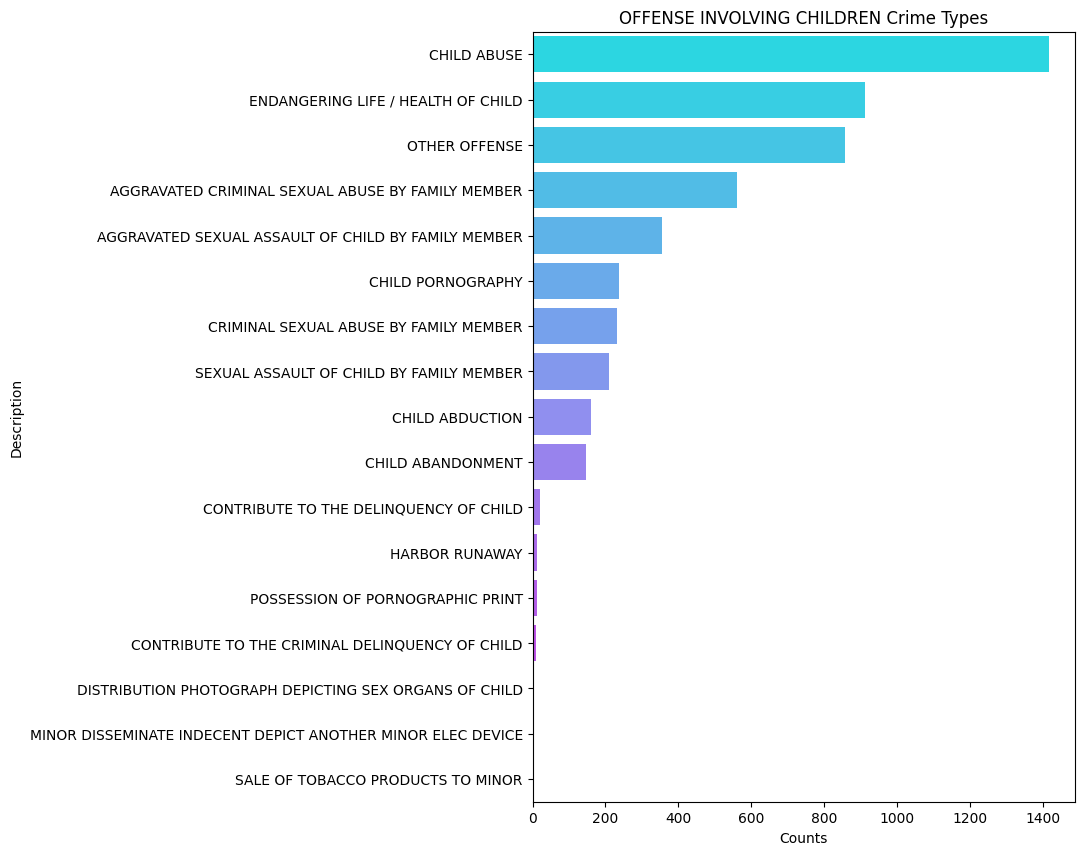

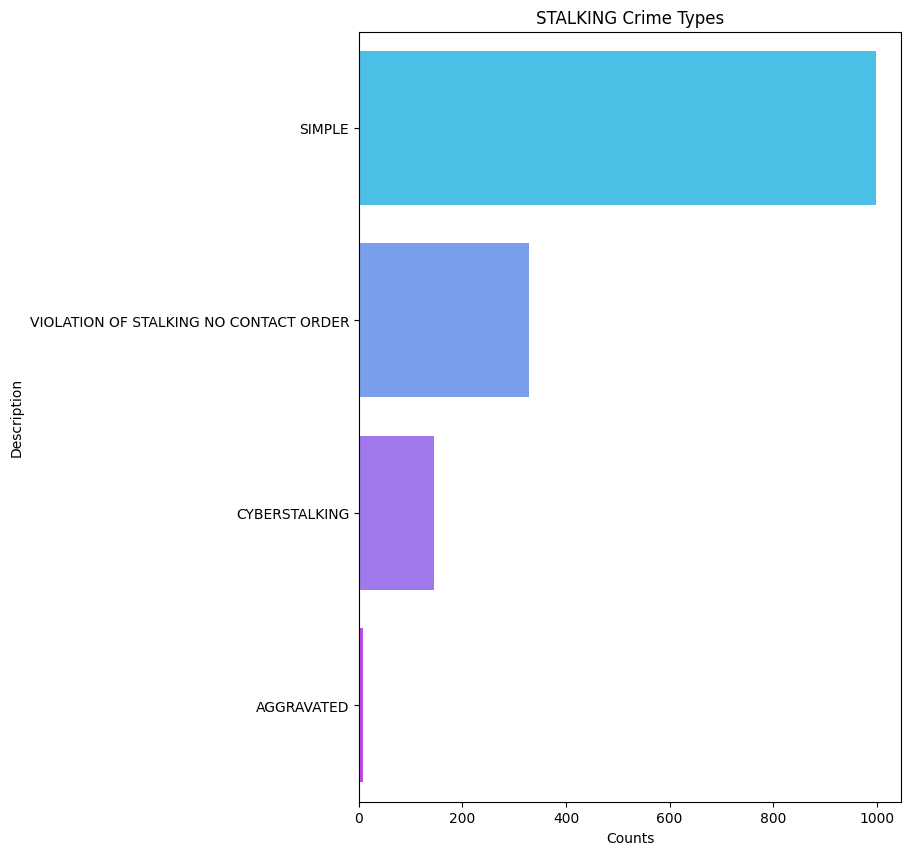

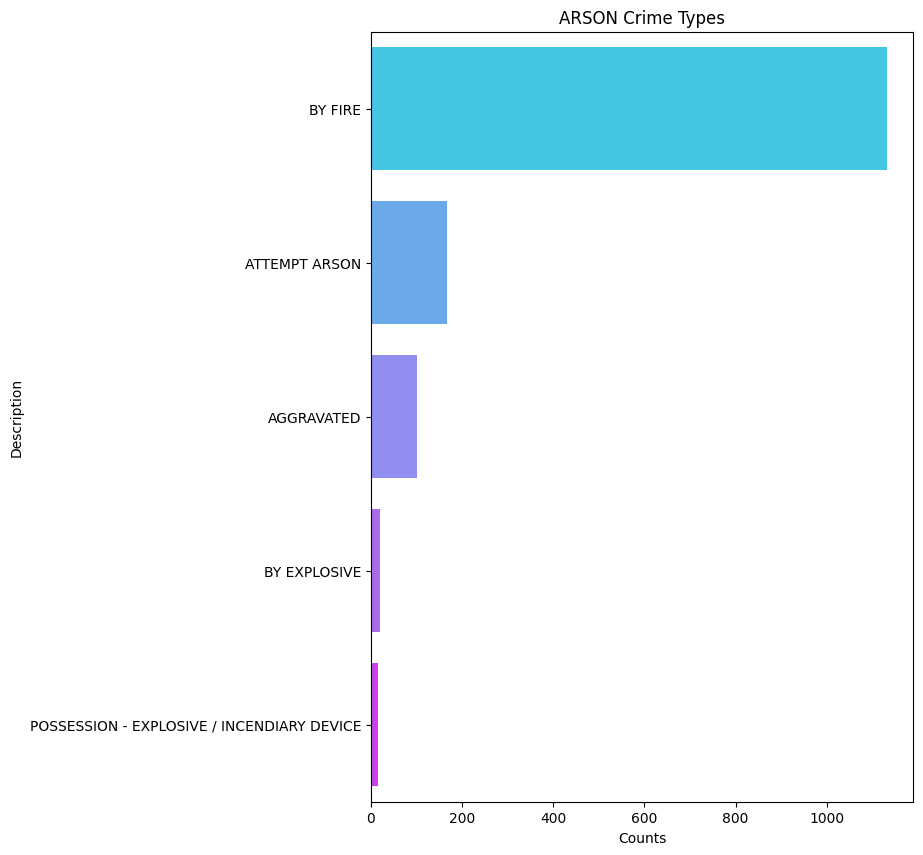

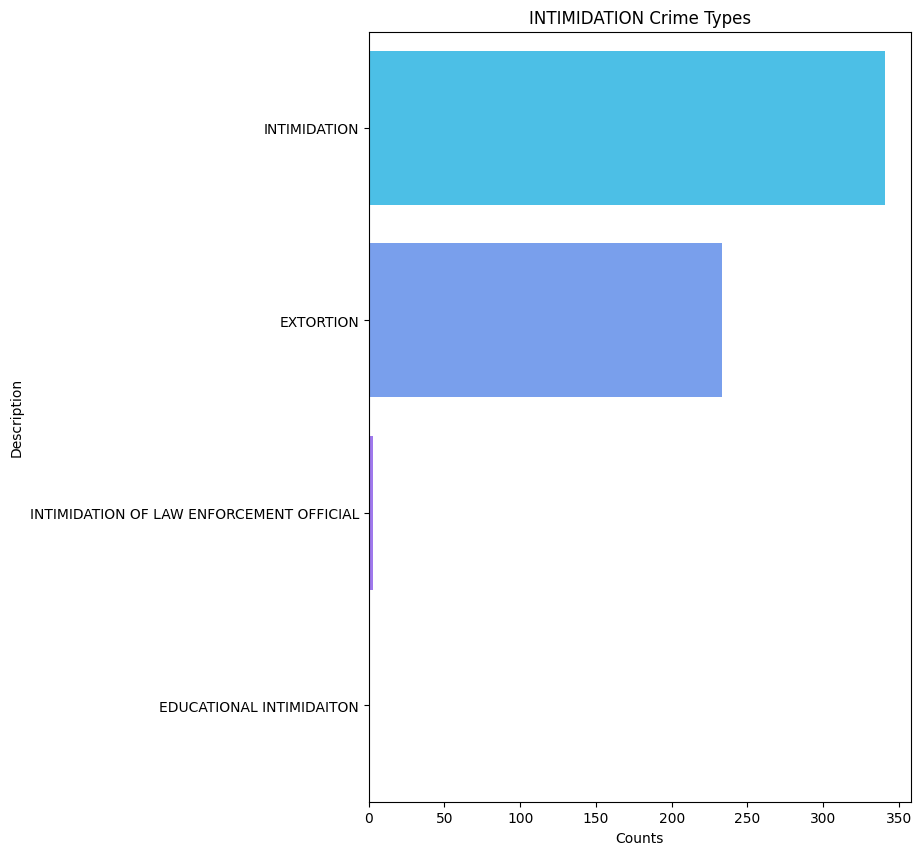

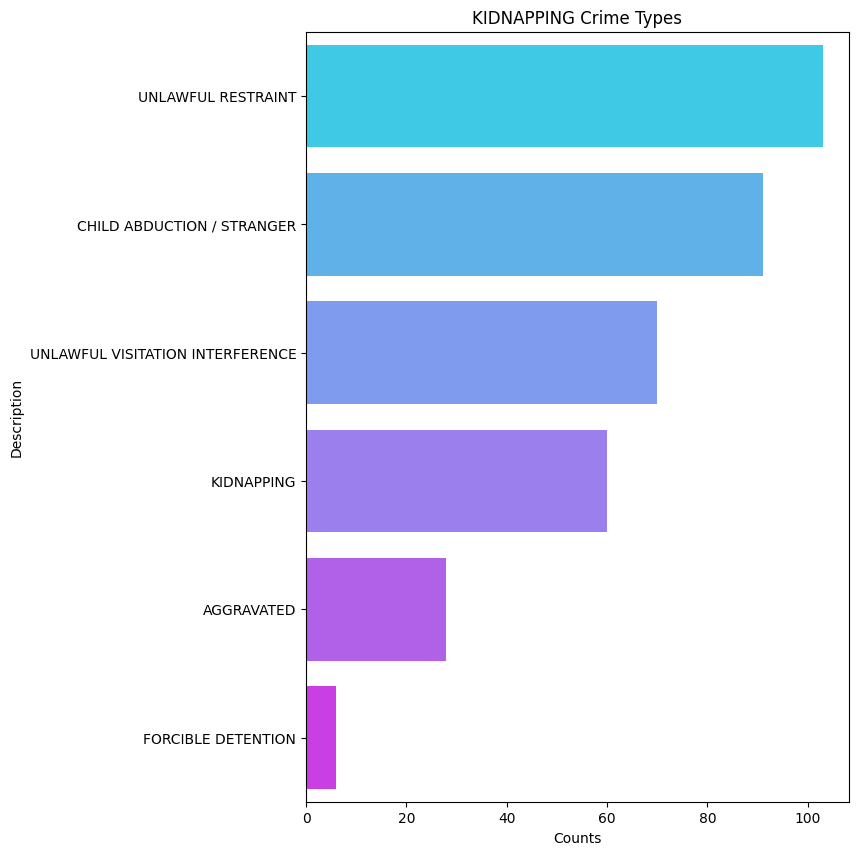

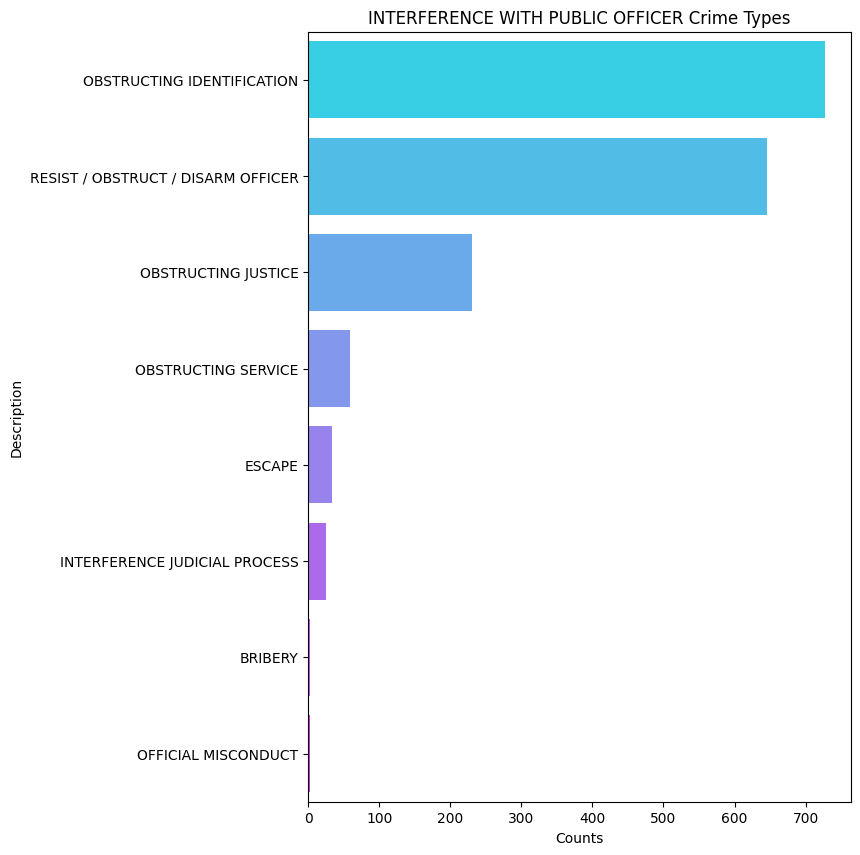

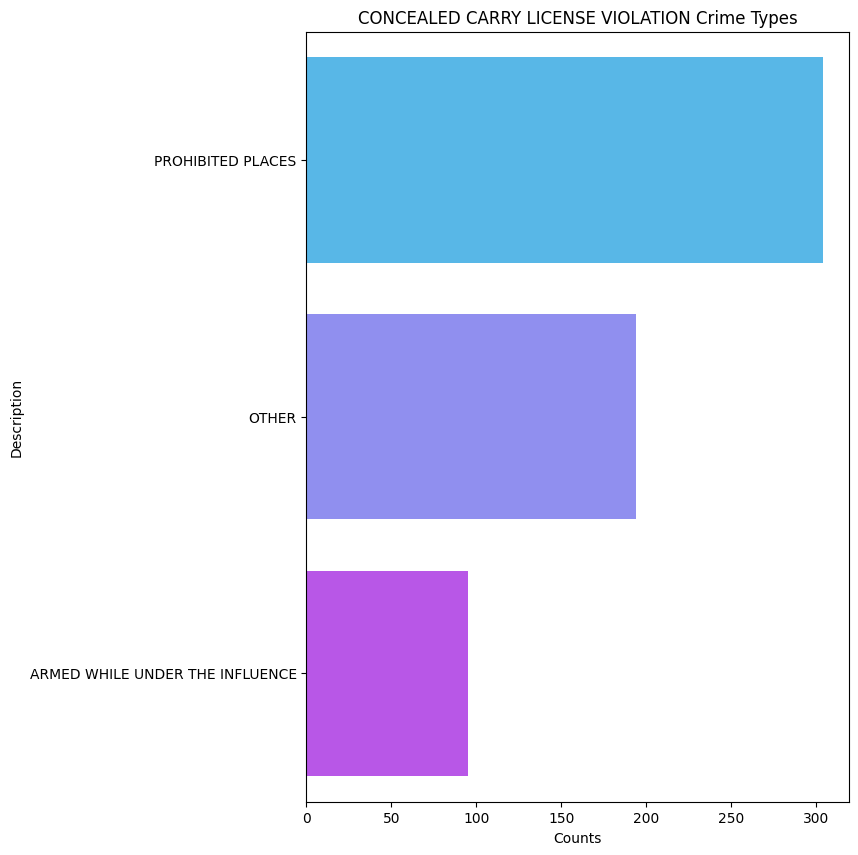

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


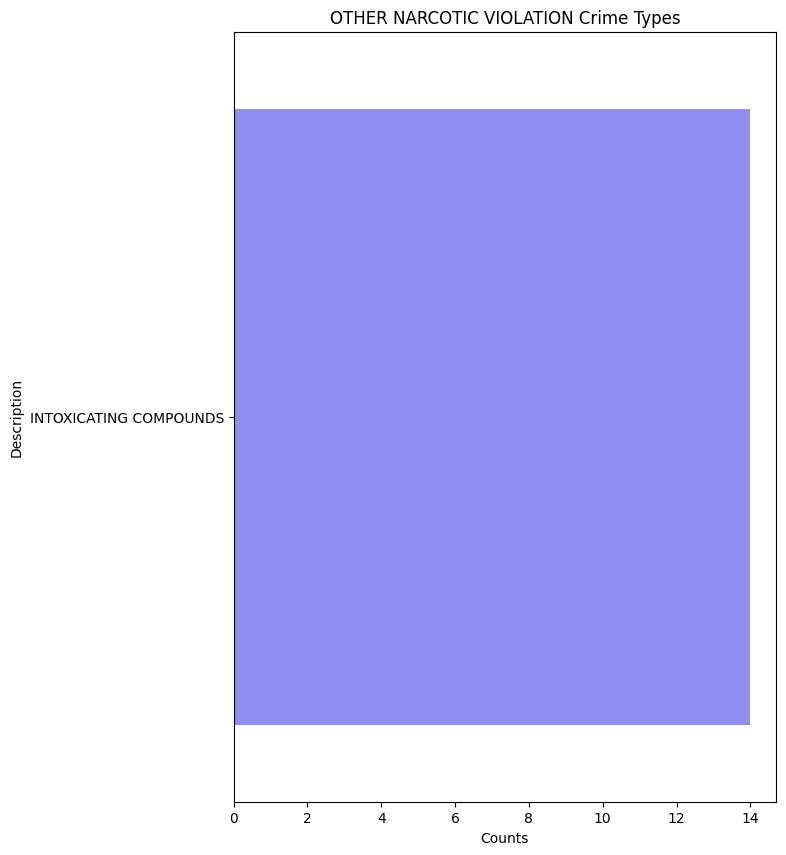

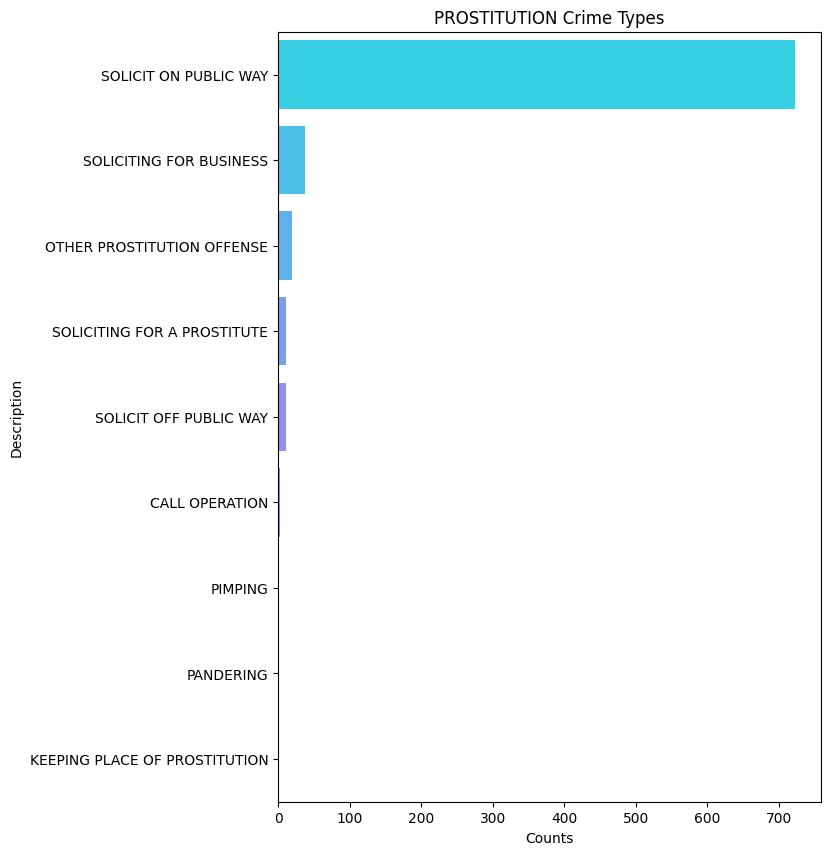

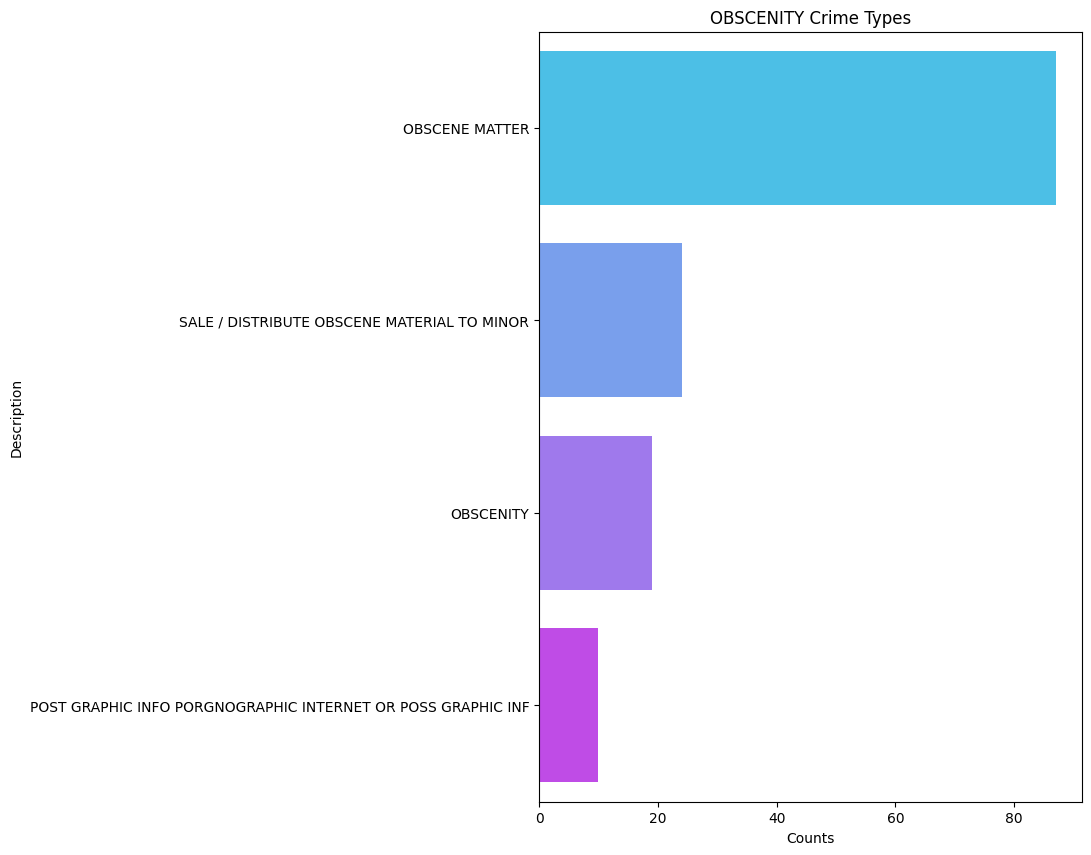

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


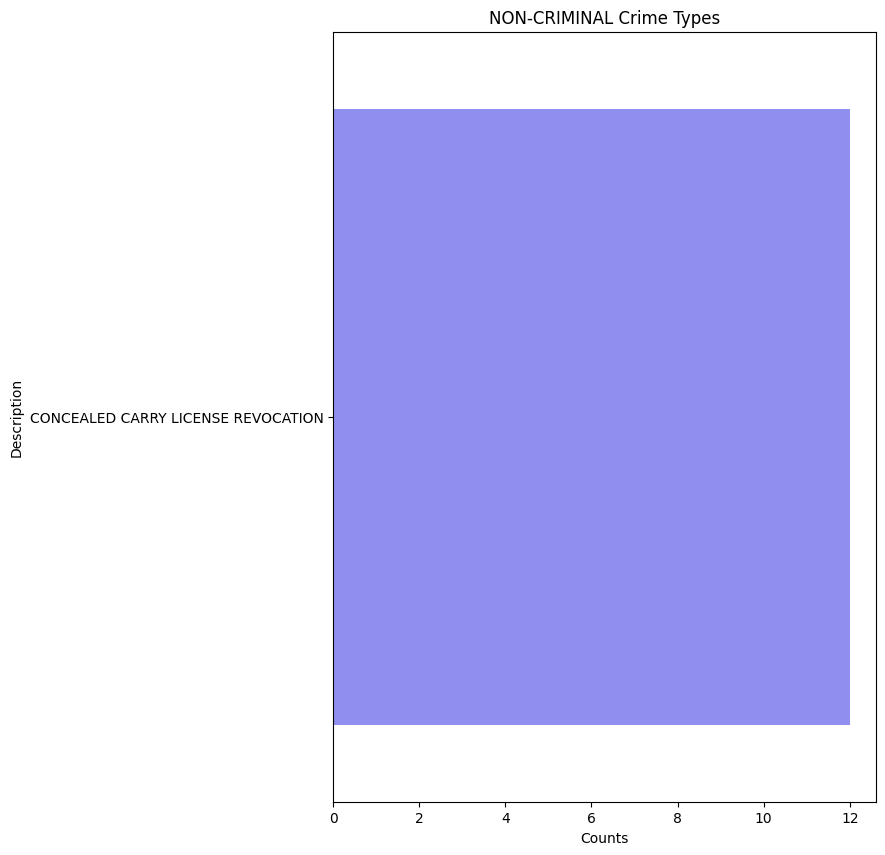

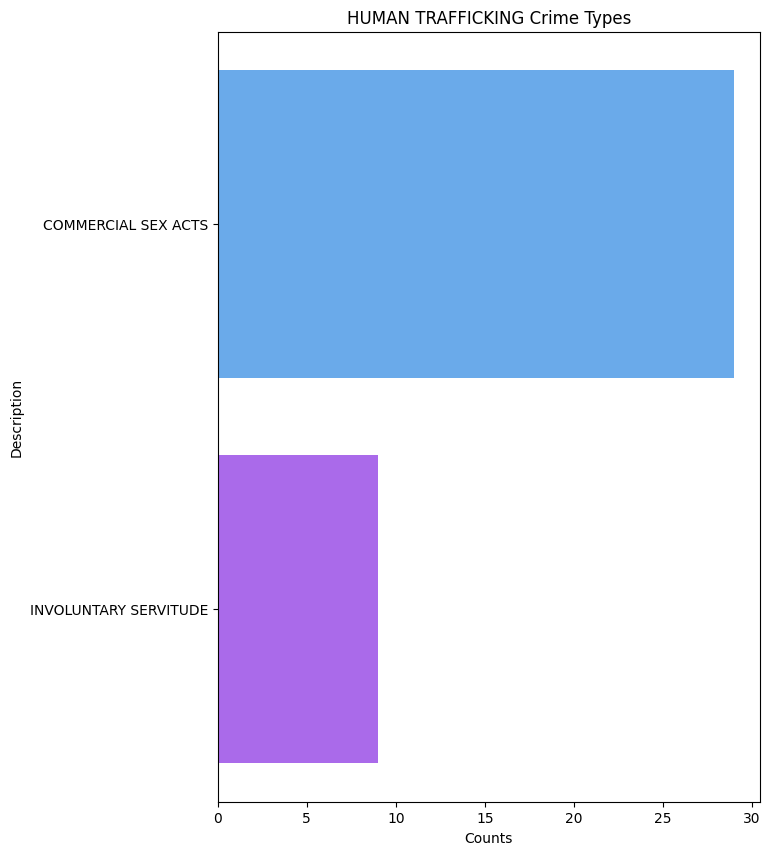

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


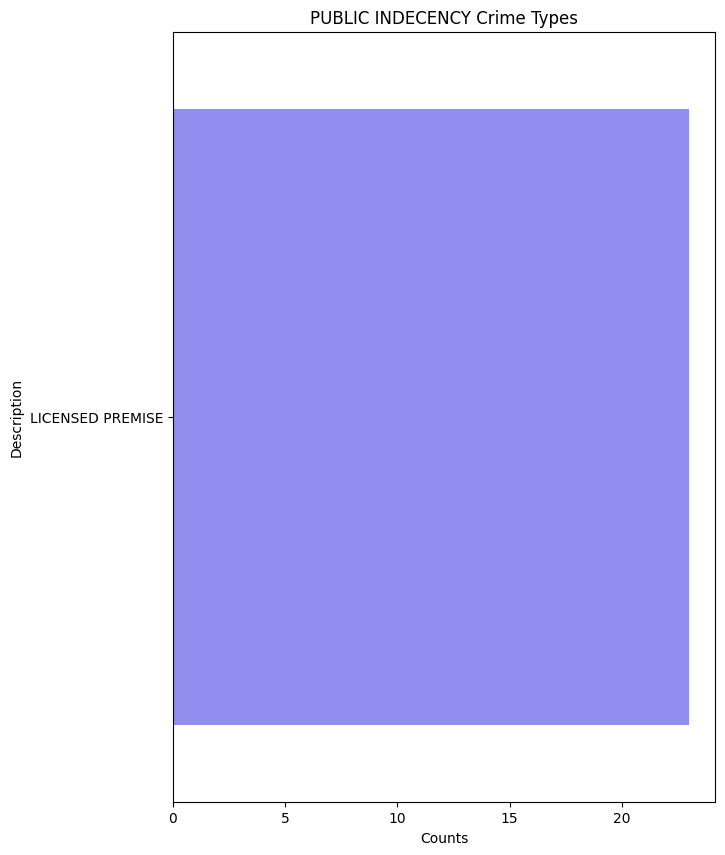

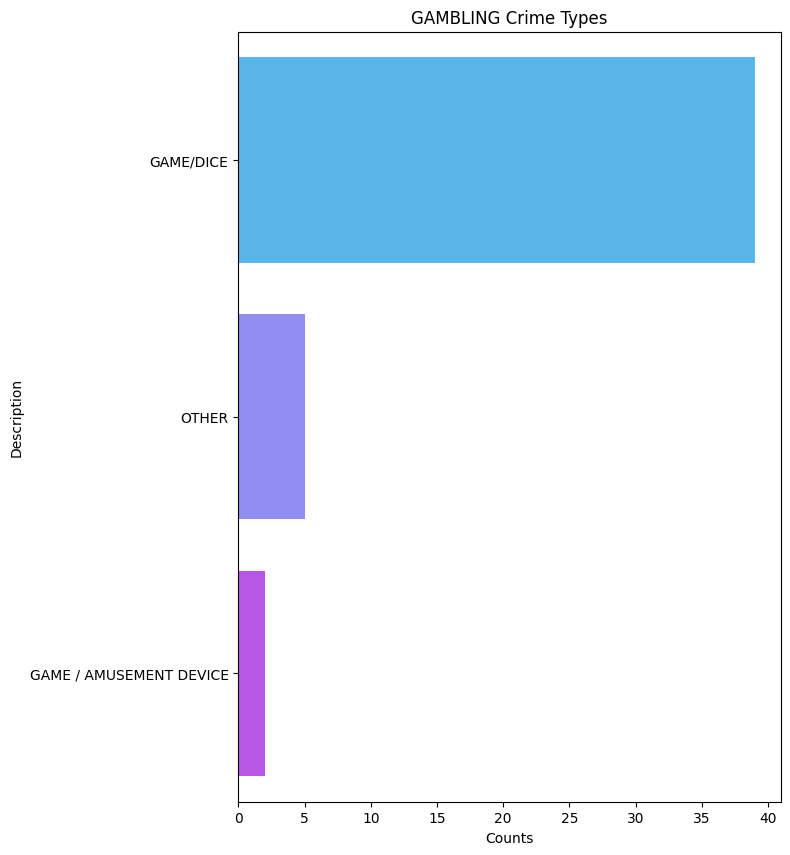

In [33]:
crime_types = df['Primary Type'].unique()
for crime in crime_types:
    plt.figure(figsize=(7, 10))
    crime_data = df[df['Primary Type'] == crime]
    description_counts = crime_data['Description'].value_counts().reset_index()
    description_counts.columns = ['Description', 'Counts']
    sns.barplot(y='Description', x='Counts', data=description_counts, palette='cool')
    plt.title(f'{crime} Crime Types')
    plt.xlabel('Counts')
    plt.ylabel('Description')
    plt.show()

In [34]:
crimes = df['District'].unique()
crimes

array([15, 24, 22,  9,  1, 18, 11, 10,  4,  6,  3, 17,  2, 19, 20,  5,  8,
       12, 25,  7, 14, 16, 31], dtype=int64)

In [35]:
top_5_District = df['District'].value_counts().sort_values(ascending=False).head()
top_5_District

District
8     49382
12    46447
6     45650
4     42937
1     42151
Name: count, dtype: int64

In [36]:
def day(x):
    return x.strftime("%A")
df['Day'] = df['Date'].apply(day)

In [37]:
cols = ['Date', 'Block', 'Location Description', 'Domestic', 'District','Month', 'Primary Type']
new_df = df[cols]
new_df.head()

,Date,Block,Location Description,Domestic,District,Month,Primary Type
0,2022-12-31 23:55:00,055XX W ADAMS ST,RESIDENCE - YARD (FRONT / BACK),False,15,December,WEAPONS VIOLATION
1,2022-12-31 23:50:00,055XX W WASHINGTON BLVD,APARTMENT,True,15,December,BATTERY
2,2022-12-31 23:50:00,014XX W LUNT AVE,ALLEY,False,24,December,MOTOR VEHICLE THEFT
3,2022-12-31 23:47:00,091XX S LAFLIN ST,STREET,False,22,December,ASSAULT
4,2022-12-31 23:47:00,091XX S LAFLIN ST,APARTMENT,False,22,December,WEAPONS VIOLATION


In [38]:
def new_hour(x):
    return int(x.strftime("%H"))
new_df['Hour'] = new_df['Date'].apply(new_hour)

C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\295491757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Hour'] = new_df['Date'].apply(new_hour)


In [39]:
def new_day(x):
    return int(x.strftime("%w"))
new_df['Day'] = new_df['Date'].apply(new_day)

C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\911806837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day'] = new_df['Date'].apply(new_day)


In [40]:
def new_month(x):
    return int(x.strftime("%m"))
new_df['Month_num'] = new_df['Date'].apply(new_month)

C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\762440598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month_num'] = new_df['Date'].apply(new_month)


In [41]:
new_df.head()

,Date,Block,Location Description,Domestic,District,Month,Primary Type,Hour,Day,Month_num
0,2022-12-31 23:55:00,055XX W ADAMS ST,RESIDENCE - YARD (FRONT / BACK),False,15,December,WEAPONS VIOLATION,23,6,12
1,2022-12-31 23:50:00,055XX W WASHINGTON BLVD,APARTMENT,True,15,December,BATTERY,23,6,12
2,2022-12-31 23:50:00,014XX W LUNT AVE,ALLEY,False,24,December,MOTOR VEHICLE THEFT,23,6,12
3,2022-12-31 23:47:00,091XX S LAFLIN ST,STREET,False,22,December,ASSAULT,23,6,12
4,2022-12-31 23:47:00,091XX S LAFLIN ST,APARTMENT,False,22,December,WEAPONS VIOLATION,23,6,12


In [42]:
new_df['Location Description'] = new_df['Location Description'].astype('category')
new_df['Domestic'] = new_df['Domestic'].astype('category')

new_df['Location_Cat'] = new_df['Location Description'].cat.codes
new_df['Domestic_Cat'] = new_df['Domestic'].cat.codes
new_df.head()

C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2385660770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Location Description'] = new_df['Location Description'].astype('category')
C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2385660770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Domestic'] = new_df['Domestic'].astype('category')
C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\2385660770.py:4: SettingWithCopyWarning: 
A value is trying to be set 

,Date,Block,Location Description,Domestic,District,Month,Primary Type,Hour,Day,Month_num,Location_Cat,Domestic_Cat
0,2022-12-31 23:55:00,055XX W ADAMS ST,RESIDENCE - YARD (FRONT / BACK),False,15,December,WEAPONS VIOLATION,23,6,12,114,0
1,2022-12-31 23:50:00,055XX W WASHINGTON BLVD,APARTMENT,True,15,December,BATTERY,23,6,12,17,1
2,2022-12-31 23:50:00,014XX W LUNT AVE,ALLEY,False,24,December,MOTOR VEHICLE THEFT,23,6,12,15,0
3,2022-12-31 23:47:00,091XX S LAFLIN ST,STREET,False,22,December,ASSAULT,23,6,12,129,0
4,2022-12-31 23:47:00,091XX S LAFLIN ST,APARTMENT,False,22,December,WEAPONS VIOLATION,23,6,12,17,0


In [43]:
z_scores = np.abs(stats.zscore(new_df.select_dtypes(include=[np.number])))  
outliers = (z_scores > 3).all(axis=1)  
outliers_data = new_df[outliers]  

In [44]:
outliers_data

,Date,Block,Location Description,Domestic,District,Month,Primary Type,Hour,Day,Month_num,Location_Cat,Domestic_Cat


In [45]:
numerical_columns = df.select_dtypes(include=['number'])
variance = numerical_columns.var()
print(variance)

Unnamed: 0        4.957304e+10
ID                5.490844e+11
Beat              5.039451e+05
District          5.033372e+01
Ward              1.970063e+02
Community Area    4.651695e+02
X Coordinate      2.699258e+08
Y Coordinate      1.013838e+09
Year              7.032271e-01
Latitude          7.667852e-03
Longitude         3.573273e-03
dtype: float64


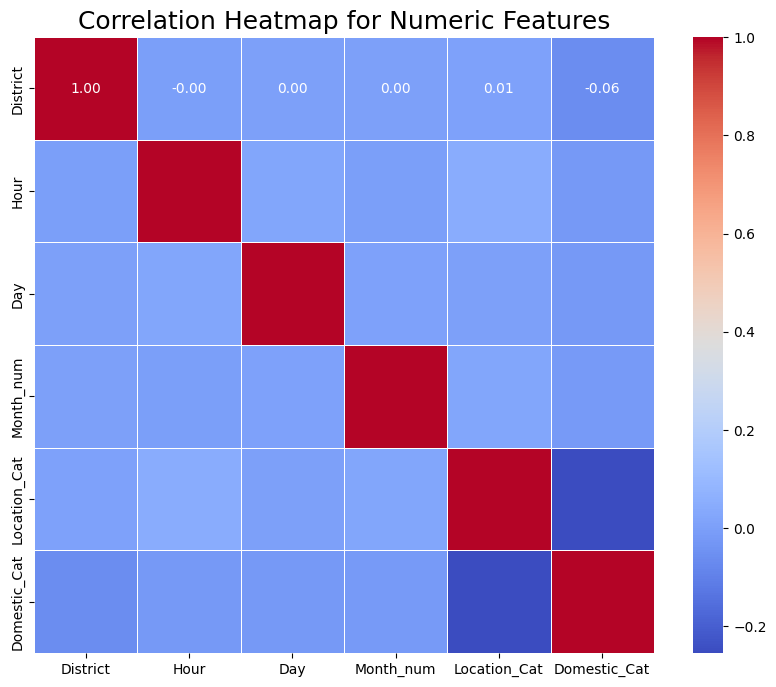

In [46]:
numeric_df = new_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features', fontsize=18)
plt.show()

In [47]:
def day_conv(x):
    return x.strftime("%a")
new_df['Day Name'] = new_df['Date'].apply(day_conv)

C:\Users\Scott Fernandes\AppData\Local\Temp\ipykernel_320\309894684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day Name'] = new_df['Date'].apply(day_conv)


In [48]:
cri4 = new_df.groupby(['Month_num','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri4 = cri4.sort_values(by=['District'], ascending=False)
cri4.head()

,Month_num,Day,District,Hour,Primary Type
2644,1,4,31,23,1
2114,1,3,31,17,1
12674,4,2,31,7,1
12675,4,2,31,15,1
27460,8,2,31,12,2


In [49]:
cri4 = cri4[['Month_num','Day','Hour','Primary Type','District']]
cri4.head()
cri4.shape

(44363, 5)

In [50]:
print(cri4['Primary Type'].max(),cri4['Primary Type'].min())

76 1


In [51]:
print("Average no. of crime per month per day per district per hour :",cri4['Primary Type'].sum()/44363,".")

Average no. of crime per month per day per district per hour : 17.180285372945924 .


In [52]:
def crime_rate_assign(x):
    if(x<=7):
        return 0
    else:
        return 1
cri4['Alarm'] = cri4['Primary Type'].apply(crime_rate_assign)
cri4 = cri4[['Month_num','Day','Hour','District','Primary Type','Alarm']]
cri4.tail(50)

,Month_num,Day,Hour,District,Primary Type,Alarm
28539,8,5,19,1,36,1
28540,8,5,20,1,45,1
28541,8,5,21,1,46,1
28542,8,5,22,1,38,1
28543,8,5,23,1,20,1
29049,8,6,1,1,27,1
28530,8,5,10,1,25,1
29050,8,6,2,1,13,1
29051,8,6,3,1,14,1
29052,8,6,4,1,18,1


In [53]:
correlation_matrix = cri4.corr()
print(correlation_matrix)

              Month_num       Day      Hour  District  Primary Type     Alarm
Month_num      1.000000  0.000362 -0.000225 -0.000116      0.035263  0.025430
Day            0.000362  1.000000  0.000171 -0.000414      0.015484 -0.000453
Hour          -0.000225  0.000171  1.000000  0.001020      0.268167  0.297859
District      -0.000116 -0.000414  0.001020  1.000000     -0.237487 -0.151543
Primary Type   0.035263  0.015484  0.268167 -0.237487      1.000000  0.531384
Alarm          0.025430 -0.000453  0.297859 -0.151543      0.531384  1.000000


In [54]:
X = cri4.iloc[:,0:4].values
y = cri4.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [73]:
from tensorflow.keras.regularizers import l2
model_tensorflow = Sequential([
    Dense(512, activation='relu', input_dim=4, kernel_regularizer=l2(0.0005)),  
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.0003)),  
    BatchNormalization(),
    
    Dense(128, activation='relu'),  
    BatchNormalization(),

    Dense(64, activation='relu'),  
    BatchNormalization(),

    Dense(1, activation='sigmoid')  
])

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model_tensorflow.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,945 (699.00 KB)

 Trainable params: 177,025 (691.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [75]:
model_tensorflow.compile(optimizer=Adam(learning_rate=0.0004),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [77]:
losses = model_tensorflow.fit(X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=64, 
        epochs=100, 
        callbacks=[early_stop]
)

Epoch 1/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7572 - loss: 0.6334 - val_accuracy: 0.8829 - val_loss: 0.3776
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8798 - loss: 0.3755 - val_accuracy: 0.8890 - val_loss: 0.3394
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8862 - loss: 0.3379 - val_accuracy: 0.8917 - val_loss: 0.3182
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8829 - loss: 0.3233 - val_accuracy: 0.8866 - val_loss: 0.3109
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8839 - loss: 0.3081 - val_accuracy: 0.8908 - val_loss: 0.2919
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8873 - loss: 0.2911 - val_accuracy: 0.8905 - val_loss: 0.2849
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8879 - loss: 0.2883 - val_accuracy: 0.8859 - val_loss: 0.2790
Epoch 8/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8903 - loss: 0.2767 - val_acc

555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9035 - loss: 0.2238 - val_accuracy: 0.9001 - val_loss: 0.2289
Epoch 52/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9052 - loss: 0.2174 - val_accuracy: 0.8976 - val_loss: 0.2323
Epoch 53/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9010 - loss: 0.2241 - val_accuracy: 0.9012 - val_loss: 0.2292
Epoch 54/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9022 - loss: 0.2207 - val_accuracy: 0.9008 - val_loss: 0.2307
Epoch 55/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9023 - loss: 0.2217 - val_accuracy: 0.8981 - val_loss: 0.2331
Epoch 56/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9040 - loss: 0.2231 - val_accuracy: 0.9004 - val_loss: 0.2294
Epoch 57/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9024 - loss: 0.2244 - val_accuracy: 0.8998 - val_loss: 0.2297
Epoch 58/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9007 - loss: 0.2231 - val_accuracy:

<Axes: >

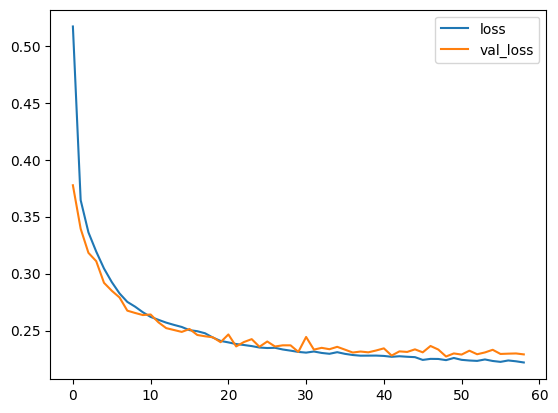

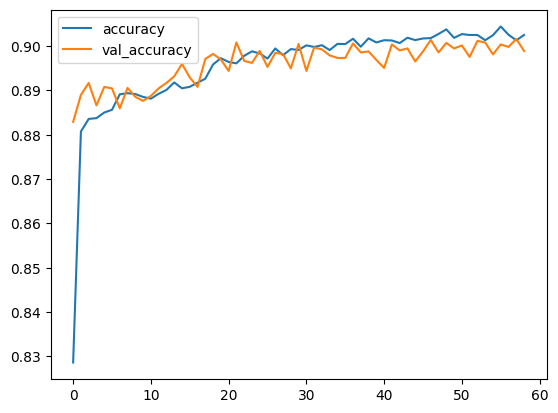

In [78]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()
loss_df.loc[:,['accuracy','val_accuracy']].plot()

In [62]:
y_pred = model_tensorflow.predict(X_test)

278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [63]:
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
print(y_pred_binary)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [64]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")

 Accuracy: 0.8989
 Precision: 0.9208
 Recall: 0.9664
 F1-Score: 0.9430


In [65]:
scaled_data = scaler.transform([[2, 3, 4, 1]])  
prediction = model.predict(scaled_data)
prediction = np.where(prediction >= 0.5, 1, 0)
print(f"Model Prediction (Probability): {prediction[0]}")
print("A Crime Will Occur" if prediction[0] == 1 else "No Crime Will Occur")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model Prediction (Probability): [0]
No Crime Will Occur


In [66]:
model_scores={}
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": GaussianNB()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if name in ["Logistic Regression", "SVM", "Naïve Bayes"]:
        y_pred = np.where(y_pred >= 0.5, 1, 0)
    accuracy_random_forest = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred )
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores[name] = accuracy
    print(f"\n{name} Model Performance:")
    print(f" Accuracy: {accuracy_random_forest:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-Score: {f1:.4f}")
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"\n Best Model Selected: {best_model_name} with Accuracy: {model_scores[best_model_name]:.4f}")


Random Forest Model Performance:
 Accuracy: 0.8969
 Precision: 0.9304
 Recall: 0.9521
 F1-Score: 0.9411

Logistic Regression Model Performance:
 Accuracy: 0.8572
 Precision: 0.8655
 Recall: 0.9887
 F1-Score: 0.9230

SVM Model Performance:
 Accuracy: 0.8803
 Precision: 0.8856
 Recall: 0.9896
 F1-Score: 0.9347

KNN Model Performance:
 Accuracy: 0.8777
 Precision: 0.9098
 Recall: 0.9533
 F1-Score: 0.9310

Decision Tree Model Performance:
 Accuracy: 0.8689
 Precision: 0.9287
 Recall: 0.9192
 F1-Score: 0.9239

Naïve Bayes Model Performance:
 Accuracy: 0.8634
 Precision: 0.8658
 Recall: 0.9967
 F1-Score: 0.9267

 Best Model Selected: Random Forest with Accuracy: 0.8989


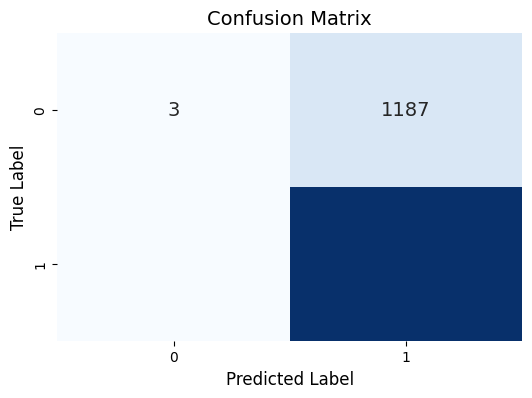

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.00      0.00      1190
           1       0.87      1.00      0.93      7683

    accuracy                           0.86      8873
   macro avg       0.49      0.50      0.47      8873
weighted avg       0.76      0.86      0.80      8873



In [67]:
def plot_confusion_matrix(y_test, y_pred, labels=None):
    conf_matrix = confusion_matrix(y_test, y_pred)
    annot_font_size = 14 if conf_matrix.shape[0] < 5 else 10
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=labels, yticklabels=labels, annot_kws={"size": annot_font_size})
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title("Confusion Matrix", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    print("Classification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

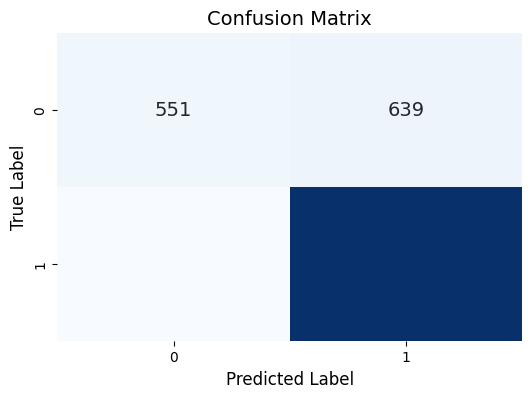

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.46      0.55      1190
           1       0.92      0.97      0.94      7683

    accuracy                           0.90      8873
   macro avg       0.80      0.71      0.75      8873
weighted avg       0.89      0.90      0.89      8873



In [68]:
#Confusion Matrix for ANN
plot_confusion_matrix(y_test, y_pred_binary, labels=[0, 1])

In [69]:
best_model

RandomForestClassifier(random_state=42)

In [80]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class ANNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model  

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def predict_proba(self, X):
        preds = self.model.predict(X)
        return np.hstack((1 - preds, preds))

ann_classifier = ANNClassifier(model_tensorflow)

rf_probs = best_model.predict_proba(X_test)
ann_probs = ann_classifier.predict_proba(X_test)

final_probs = (rf_probs + ann_probs) / 2  

final_preds = np.argmax(final_probs, axis=1)

ensemble_accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds )
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)
print(f"\nEnsemble Model Performance:")
print(f" Accuracy: {ensemble_accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Ensemble Model Performance:
 Accuracy: 0.9038
 Precision: 0.9280
 Recall: 0.9636
 F1-Score: 0.9455


In [ ]:
plot_confusion_matrix(y_test, final_preds, labels=[0, 1])